# 1. Problem Description

# 2. Import Libraries

In [1092]:
# Basic libraries 
import numpy as np 
import pandas as pd

# Visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Data Preparation 
# Features selections 
from sklearn.feature_selection import RFE 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

# Data Transformation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # data scaling

# Supervised Model : Regression model 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet 

# Model evaluation 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

# warnings 
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [1093]:
carPrice_df = pd.read_csv('CarPrice_Assignment.csv.xls')

# 3. EDA

In [1094]:
pd.set_option('display.max_columns',None)
carPrice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1095]:
carPrice_df.info()
# shape of df 
# no missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1096]:
carPrice_df.loc[carPrice_df.duplicated()]
# no duplicates 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [1097]:
#replace columns header to a more readable one ( and make the name meaningful )
replace_col = ['ID','actuarialRisk','Name','fuelType','aspiration','doorNum','body','driveWheel','engineLoc','wheelBase','bodyLength','bodyWidth','bodyHeight','curbWeight','engineType','cylinderNum','engineSize','fuelSystem','boreRatio','stroke','compressionRatio','horsePower','peakRPM','cityMPG','highwayMPG','price']

carPrice_df = carPrice_df.set_axis(replace_col,axis=1,inplace=False)
carPrice_df.head()

,ID,actuarialRisk,Name,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineType,cylinderNum,engineSize,fuelSystem,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1098]:
carPrice_df.describe()
# may have outliers : curbWeight , engineSize , horsePower , price ( diff. of 75% and max is too large )

,ID,actuarialRisk,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineSize,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Post modification to ['Name']

In [1099]:
# Left the brand name of Car in ['Name']
carPrice_df.Name = carPrice_df.Name.apply(lambda x:x.split(" ")[0])

carPrice_df.Name.value_counts()
# There are misspelled name : vw , maxda , toyouta , vokswagen , Nissan , porcshce

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Name, dtype: int64

In [1100]:
# modify ['Name'] , and replace back to carPrice_df 
carPrice_df['Name'] = carPrice_df['Name'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
carPrice_df.head()

,ID,actuarialRisk,Name,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineType,cylinderNum,engineSize,fuelSystem,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1101]:
# Drop ['ID'] : Not relevant to data analysis 
carPrice_df = carPrice_df.drop(['ID'],axis=1)

# Discover Distribution of target variable : ['price'] 

<AxesSubplot:title={'center':"Density graph of 'price'"}, xlabel='price', ylabel='Density'>

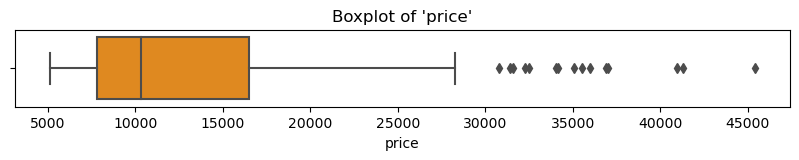

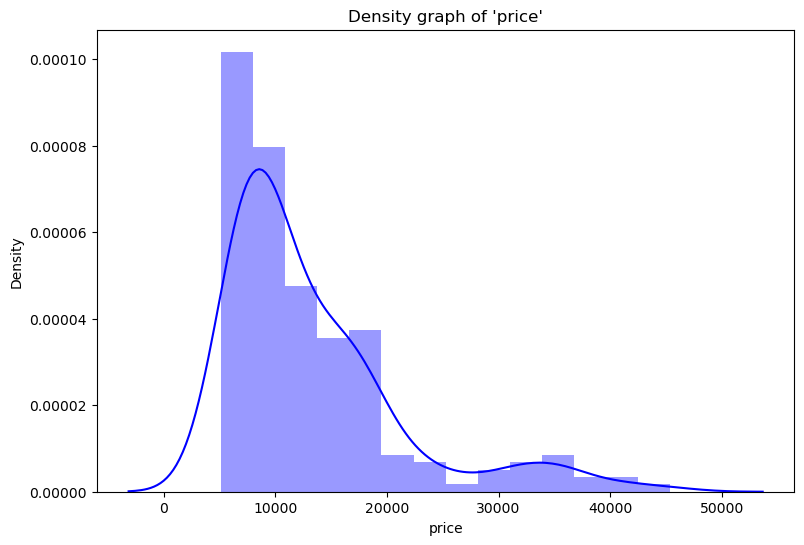

In [1102]:
# check for outlier of ['price']
# ACTUALLY I WANT IT TO BE in the same figure 

plt.figure(figsize=(10,1))
plt.title('Boxplot of \'price\'')
sns.boxplot(data=carPrice_df,x='price',fliersize=5,color='darkorange')

plt.figure(figsize=(9,6))
plt.title('Density graph of \'price\'')
sns.distplot(carPrice_df['price'],kde=True,color='blue')

# there are quite a lot outliers in ['price']

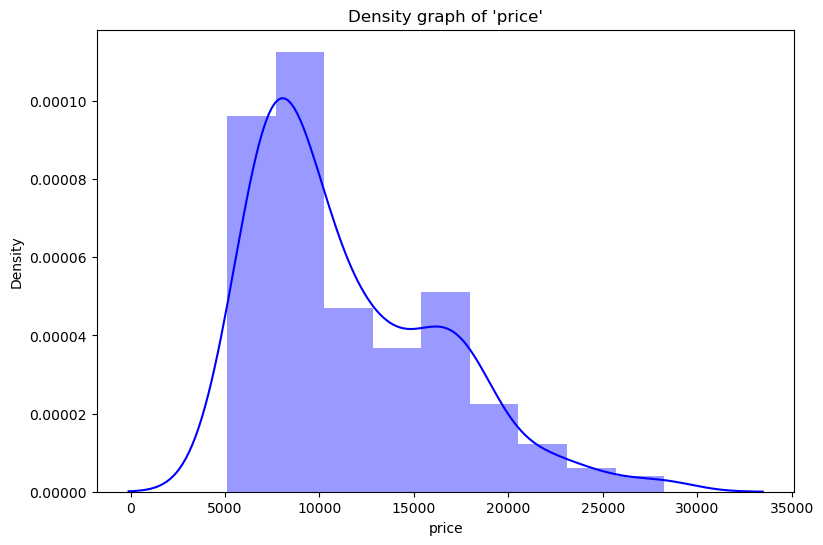

In [1103]:
# lets investigate the effect of outliers to data distribution 
# 3 major factors determine what should we do with outliers 
# 1 : source of outliers : due to collection error , or its just rare in nature ? 
# 2 : magnitude of outliers : would it be extreme that its not representative to underlying distribution ? 
# 3 : impact of outlier to model : would it make the model perform poorly ? 

X = carPrice_df['price']
Q1, Q3 = np.percentile(X, [25, 75])

# Calculate the IQR
IQR = Q3 - Q1

# Filter out the outliers
outlierFree_X = X[(X >= Q1 - 1.5 * IQR) & (X <= Q3 + 1.5 * IQR)]

# plot the graph with outlierFree_X
# check for outlier of ['price']

plt.figure(figsize=(9,6))
plt.title('Density graph of \'price\'')
sns.distplot(outlierFree_X,kde=True,color='blue')
plt.show()

# No need to remove outlier : since the underlying distribution is similiar enough

# Discover ['Name']

# Brand name against sales count 

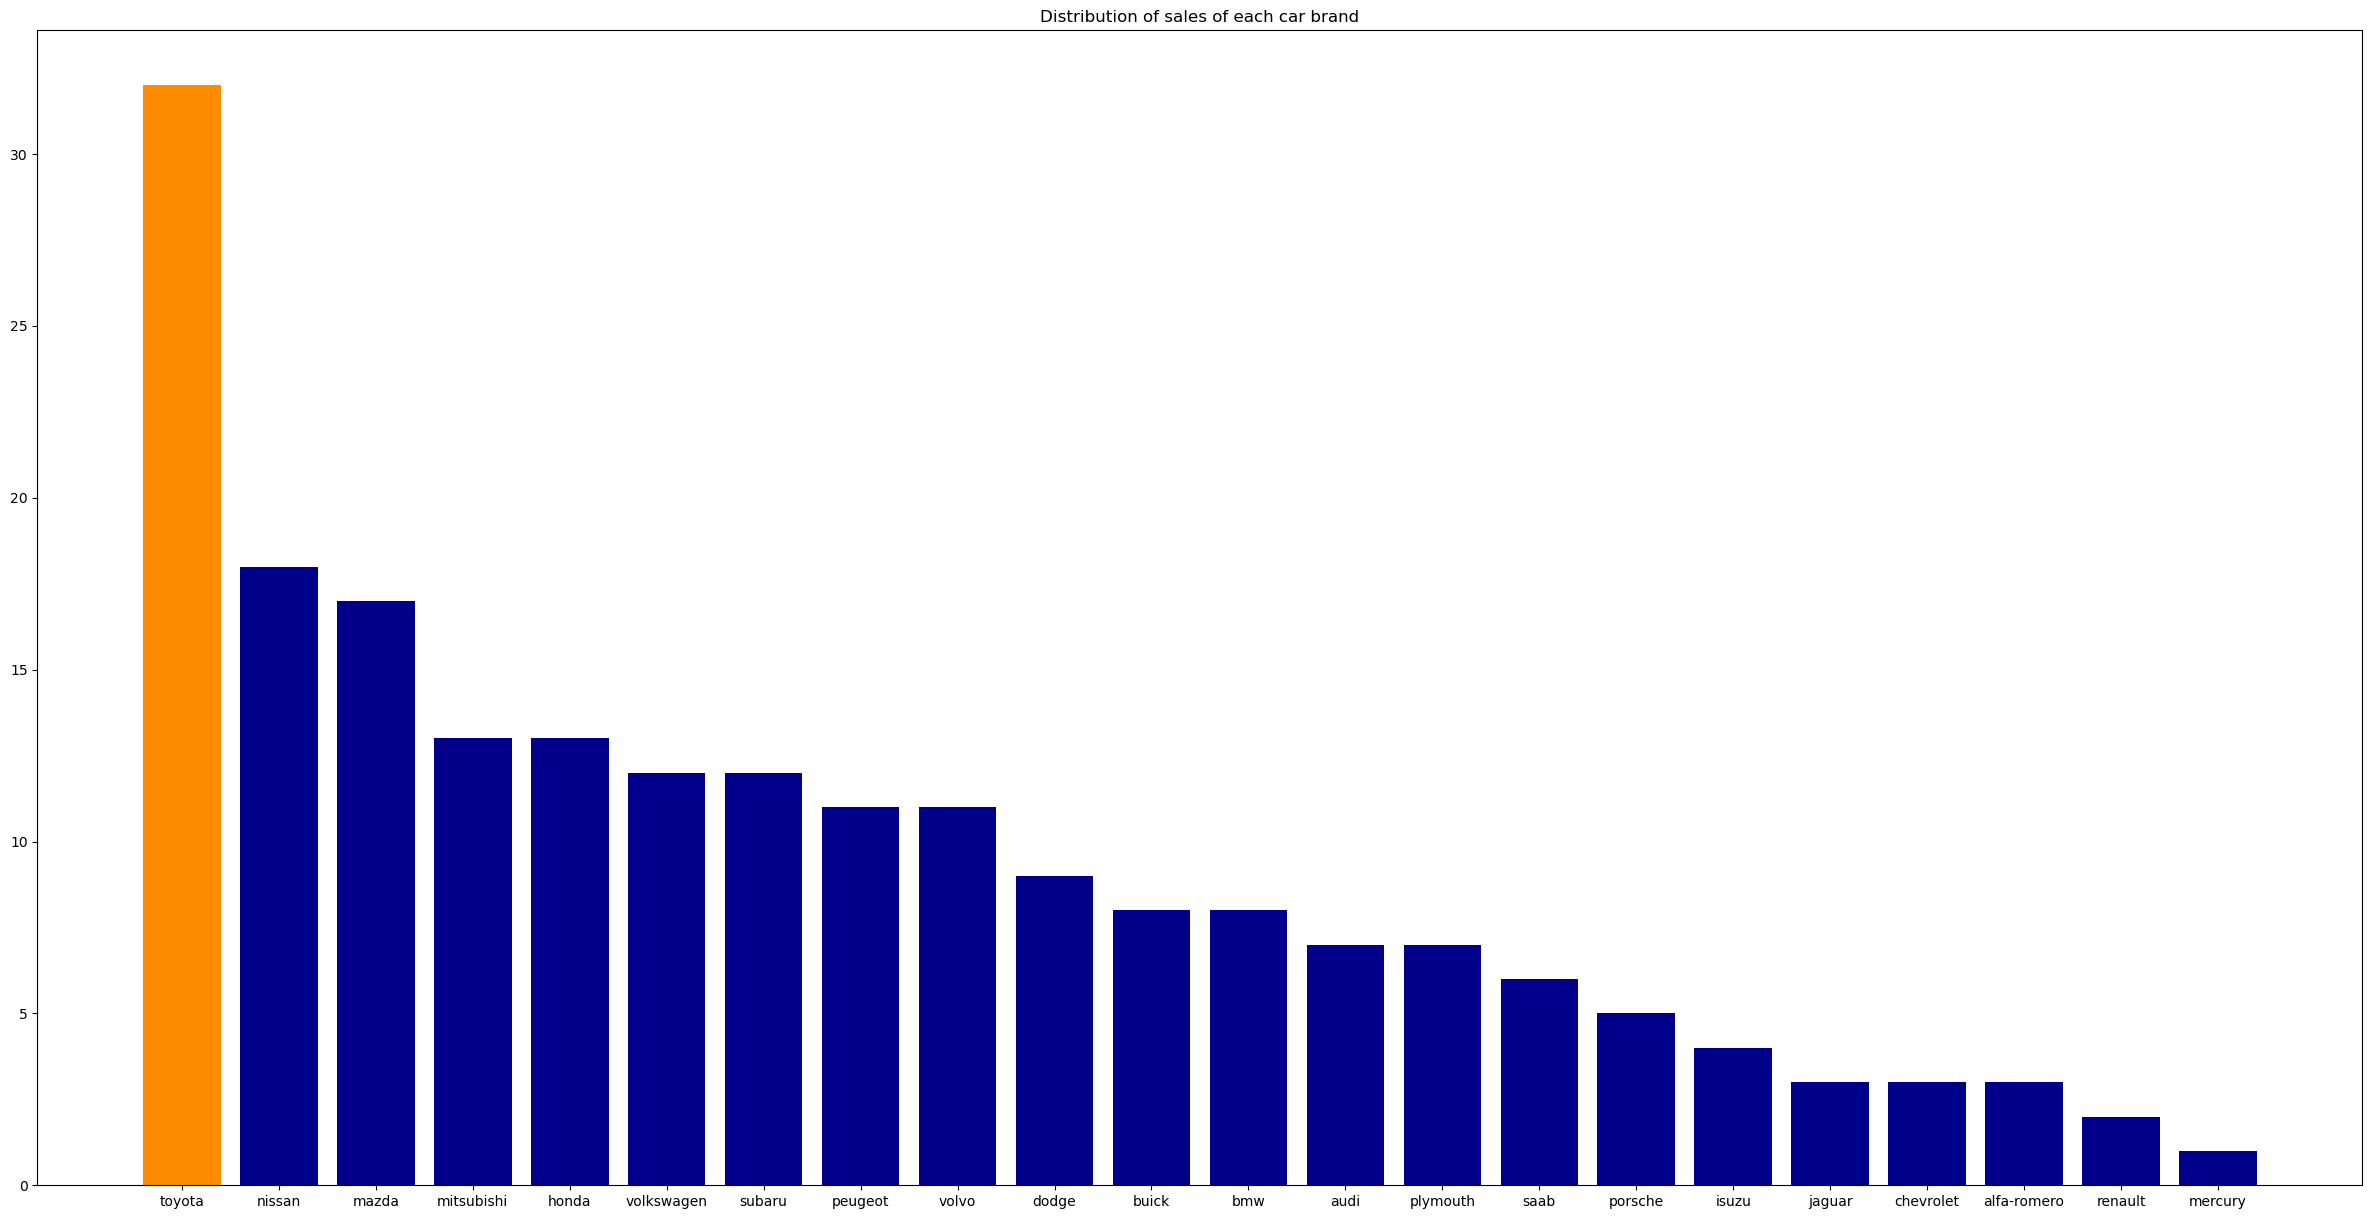

In [1104]:
# Plot ['Name'] for observing counts of each brand
def plotName_counts(input_df) : 
    plt.figure(figsize=(30,15))

    categories = pd.Series(input_df['Name'].unique())
    value = pd.Series(list(input_df['Name'].value_counts(sort=False)))

    nameCount_df = pd.concat([categories,value],axis=1,keys=['Brand','Counts']).sort_values(by='Counts',ascending=False)
    brand = list(nameCount_df['Brand'])
    counts = list(nameCount_df['Counts'])

    color = ['darkblue'] * len(brand)
    max_index = np.argmax(counts)
    color[max_index] = 'darkorange'

    plt.title('Distribution of sales of each car brand')
    plt.bar(brand,counts,color=color)
    
plotName_counts(carPrice_df)
# Below we can see brand : toyota , has the most sales which exceed 30 

# Brand name against average price

In [1105]:
carPrice_df.groupby(['Name'])['price'].mean()

Name
alfa-romero    15498.333333
audi           17859.166714
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.500000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [1106]:
categories = pd.Series(carPrice_df['Name'].unique())
value = pd.Series(list(carPrice_df.groupby(['Name'])['price'].mean()))

namePrice_df = pd.concat([categories,value],axis=1,keys=['Brand','AvgPrice'])
namePrice_df

,Brand,AvgPrice
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,chevrolet,33647.000000
4,dodge,6007.000000
5,honda,7875.444444
6,isuzu,8184.692308
7,jaguar,8916.500000
8,mazda,34600.000000
9,buick,10652.882353


# Its actually wrong .. 


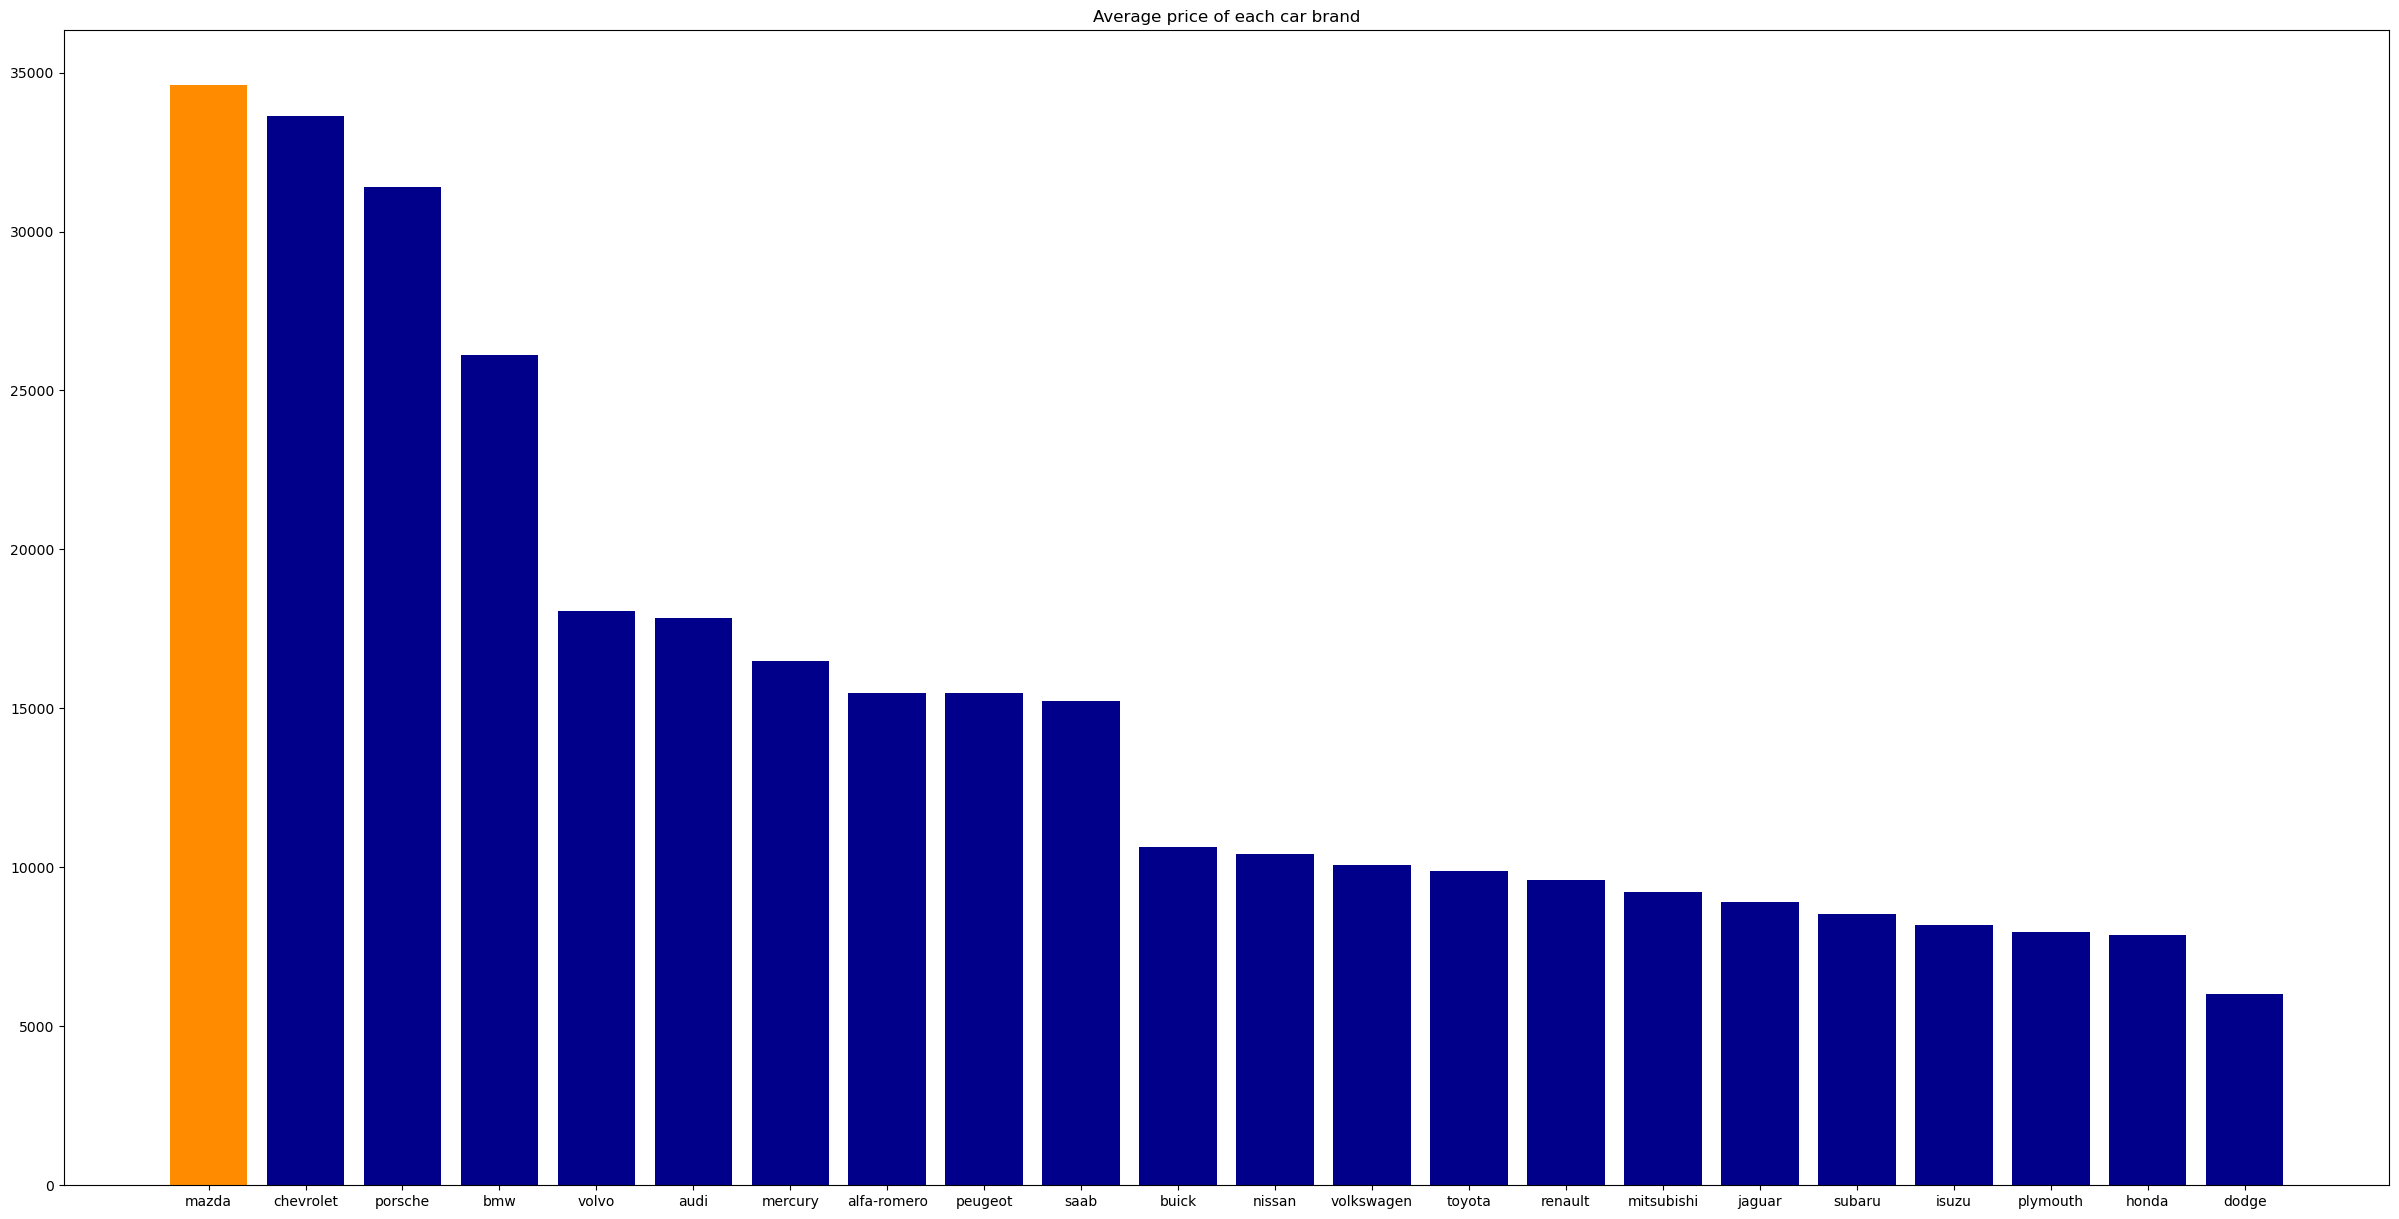

In [1107]:
# plot ['Name'] against average price
# ITS ACTUALLY WRONG 
def plotName_price(input_df) : 
    plt.figure(figsize=(30,15))

    categories = pd.Series(input_df['Name'].unique())
    value = pd.Series(list(input_df.groupby(['Name'])['price'].mean()))

    namePrice_df = pd.concat([categories,value],axis=1,keys=['Brand','AvgPrice']).sort_values(by='AvgPrice',ascending=False)

    brand = list(namePrice_df['Brand'])
    avgPrice = list(namePrice_df['AvgPrice'])

    color = ['darkblue'] * len(brand)
    max_index = np.argmax(avgPrice)
    color[max_index] = 'darkorange'

    plt.title('Average price of each car brand')
    plt.bar(brand,avgPrice,color=color)
    
plotName_price(carPrice_df)

# Separate carBrand by its price 

In [1108]:
# adding ['carCategories'] with label ['low','mid','high'] indicate price range of the car 
carPrice_df['price'] = carPrice_df['price'].astype('int')
carPrice_df_temp = carPrice_df.copy()

t = carPrice_df_temp.groupby(['Name'])['price'].mean()
carPrice_df_temp = carPrice_df_temp.merge(t.reset_index(), how='left',on='Name')

bins = [0,10000,20000,40000]
label =['low','mid','high']
carPrice_df['carCategories'] = pd.cut(carPrice_df_temp['price_y'],bins,right=False,labels=label)
carPrice_df.head()

,actuarialRisk,Name,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineType,cylinderNum,engineSize,fuelSystem,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price,carCategories
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,mid
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,mid
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,mid
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,mid
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,mid


In [1109]:
# drop ['name'] as its not gonna be used anymore 
carPrice_df = carPrice_df.drop(['Name'],axis=1)
carPrice_df.head()

,actuarialRisk,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineType,cylinderNum,engineSize,fuelSystem,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price,carCategories
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,mid
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,mid
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,mid
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,mid
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,mid


# Discover Distribution of quan data

# Separate quan_data & qua_data

In [1110]:
qua_data_col = ['actuarialRisk','fuelType','aspiration','doorNum','body','driveWheel','engineLoc','engineType','cylinderNum','fuelSystem','carCategories']
quan_data = carPrice_df.drop(columns=qua_data_col)

In [1111]:
quan_data.head()

,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineSize,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [1112]:
quan_data.info()
# There are 14 quan_datas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelBase         205 non-null    float64
 1   bodyLength        205 non-null    float64
 2   bodyWidth         205 non-null    float64
 3   bodyHeight        205 non-null    float64
 4   curbWeight        205 non-null    int64  
 5   engineSize        205 non-null    int64  
 6   boreRatio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionRatio  205 non-null    float64
 9   horsePower        205 non-null    int64  
 10  peakRPM           205 non-null    int64  
 11  cityMPG           205 non-null    int64  
 12  highwayMPG        205 non-null    int64  
 13  price             205 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 22.5 KB


In [1113]:
qua_data = carPrice_df[qua_data_col]
qua_data.head()

,actuarialRisk,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,engineType,cylinderNum,fuelSystem,carCategories
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,mid
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,mid
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,mid
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,mid
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,mid


In [1114]:
qua_data.info()
# There are 11 qua_datas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   actuarialRisk  205 non-null    int64   
 1   fuelType       205 non-null    object  
 2   aspiration     205 non-null    object  
 3   doorNum        205 non-null    object  
 4   body           205 non-null    object  
 5   driveWheel     205 non-null    object  
 6   engineLoc      205 non-null    object  
 7   engineType     205 non-null    object  
 8   cylinderNum    205 non-null    object  
 9   fuelSystem     205 non-null    object  
 10  carCategories  205 non-null    category
dtypes: category(1), int64(1), object(9)
memory usage: 16.5+ KB


# Observe relationships of quan_data to price

<Figure size 1200x1200 with 0 Axes>

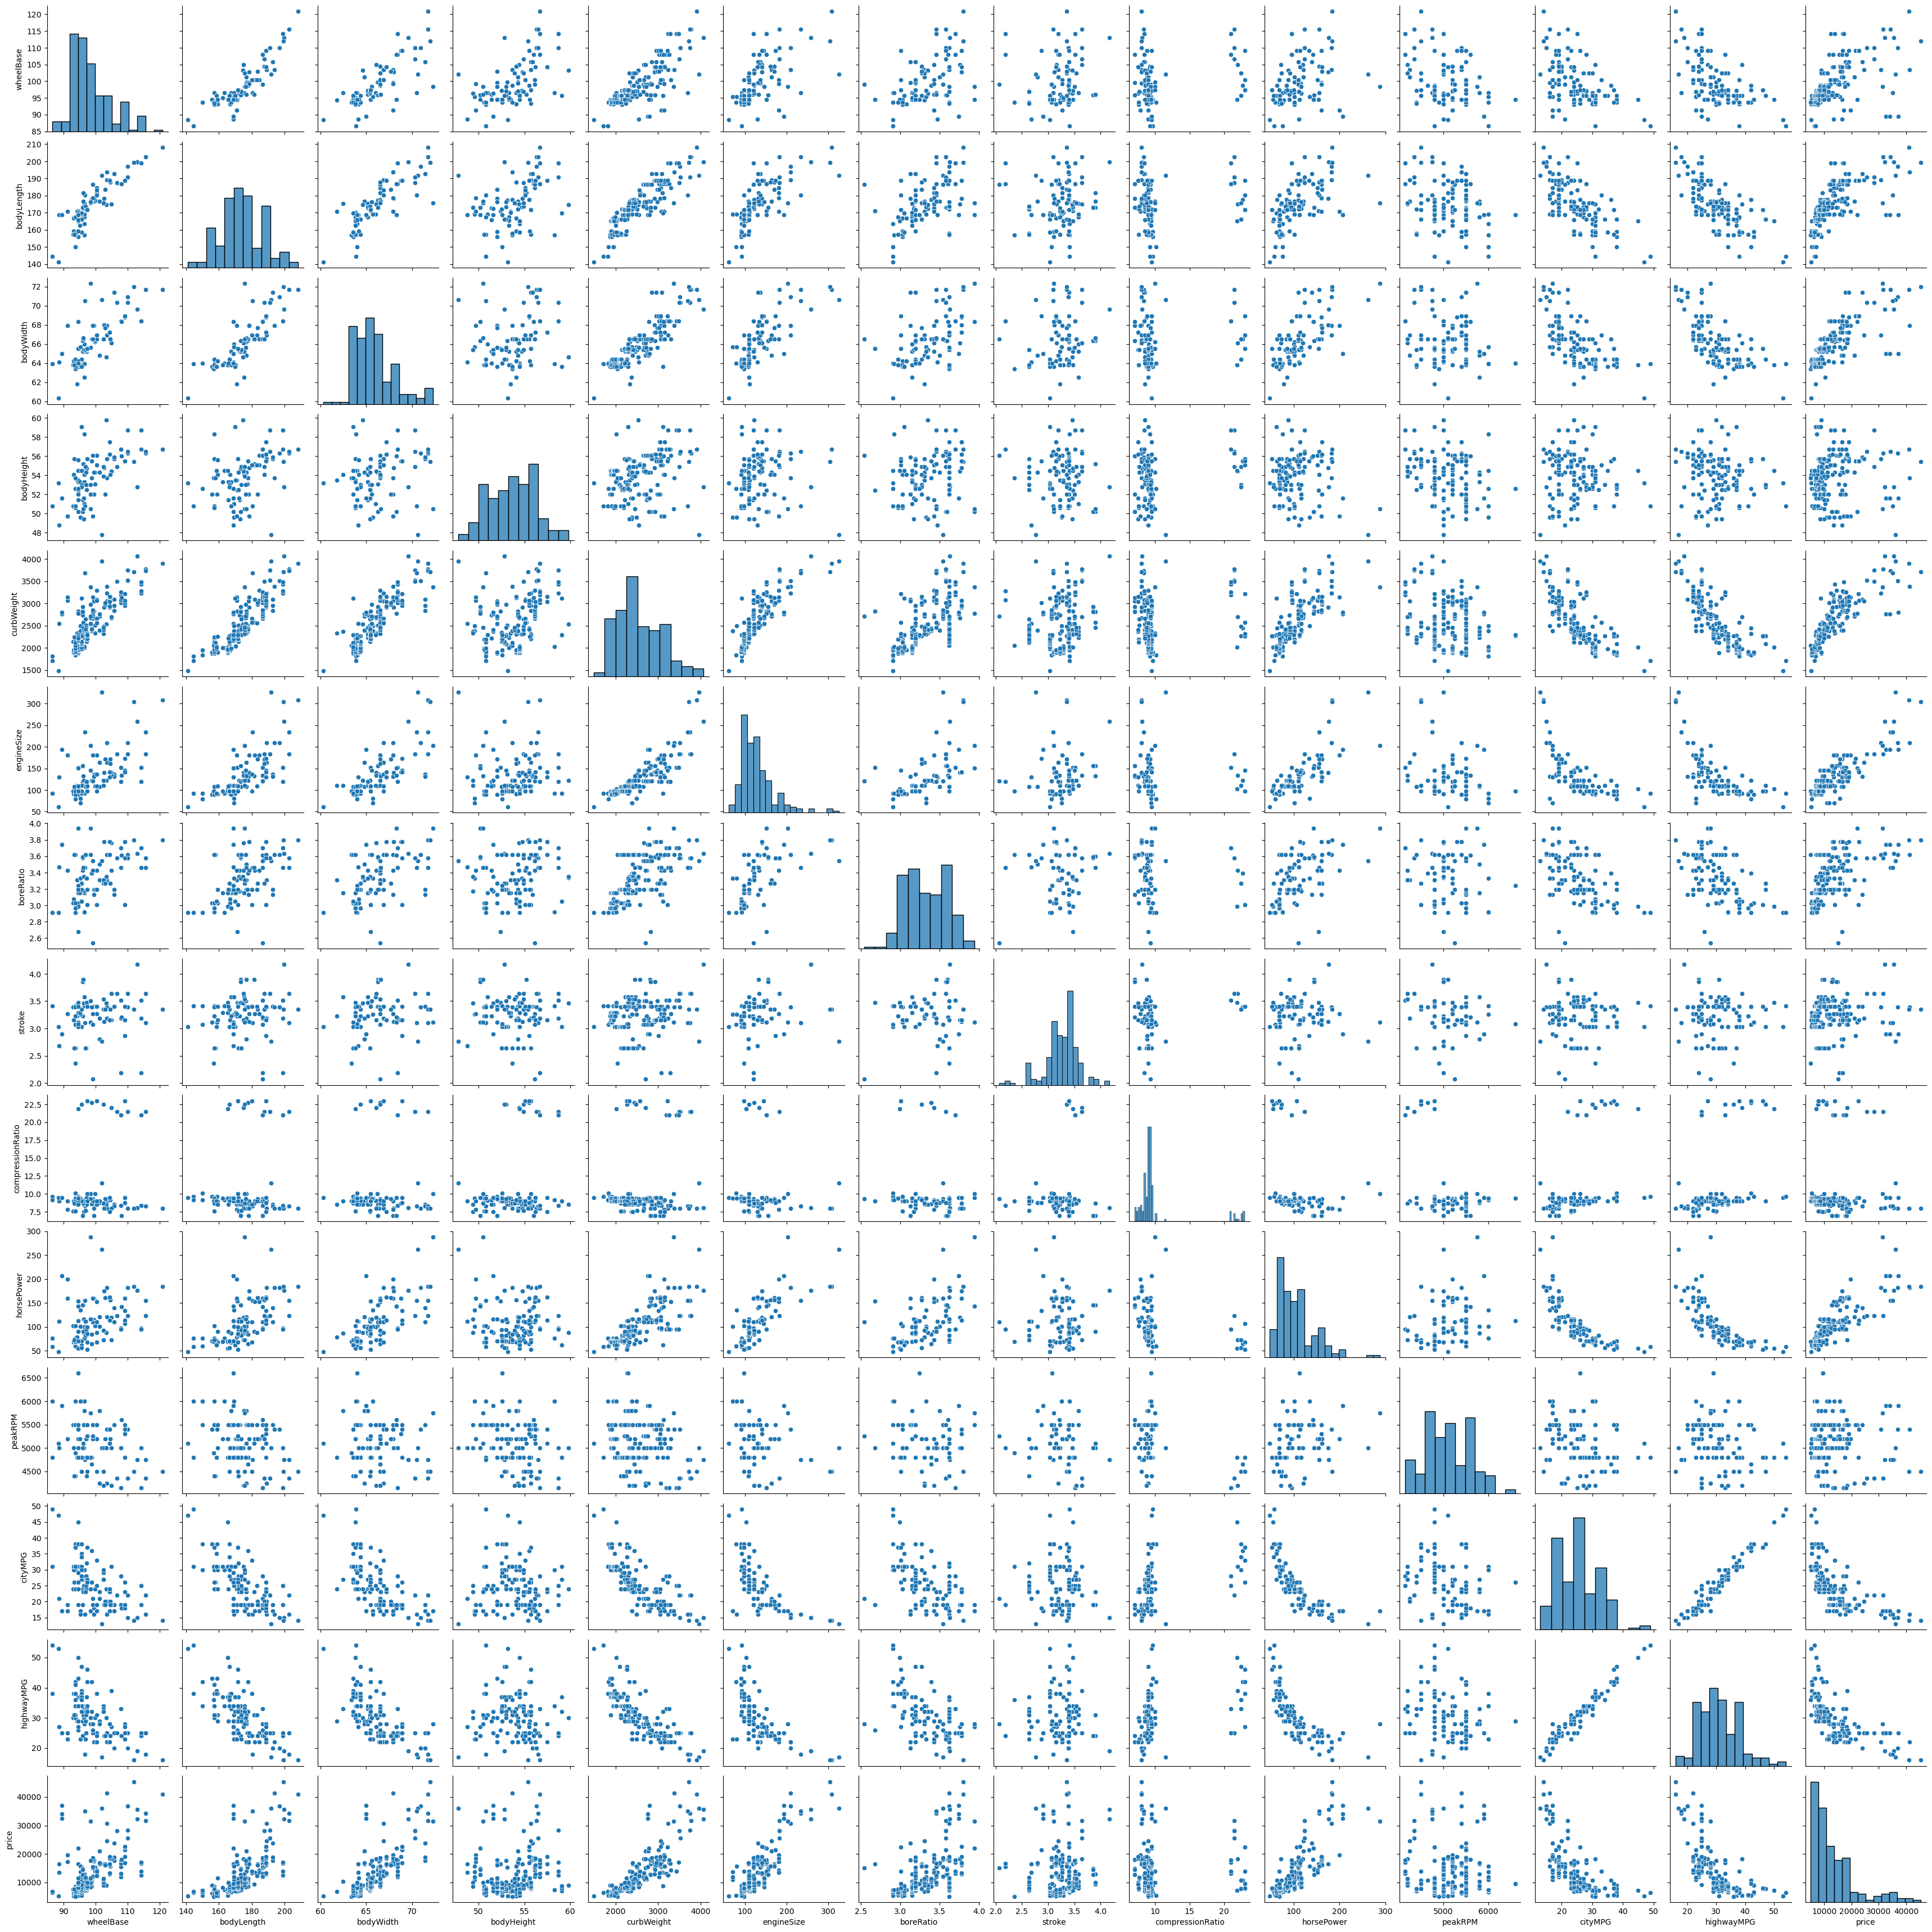

In [1115]:
# plot pairplot for quantitative data 
plt.figure(figsize=(12,12))
sns.pairplot(quan_data)
plt.show()
# outliers : compressionRatio , horsePower , peakRPM , cityMPG
# Relationship of features to price : 
# positive : wheelBase , bodyLength , bodyWidth . curbWeight , engineSize , horsePower 
# negative : cityMPG , highwayMPG 
# not so related : compressionRatio , stroke , boreRatio , peakRPM , bodyHeight 

# Observe Data skewness ( quan ) 

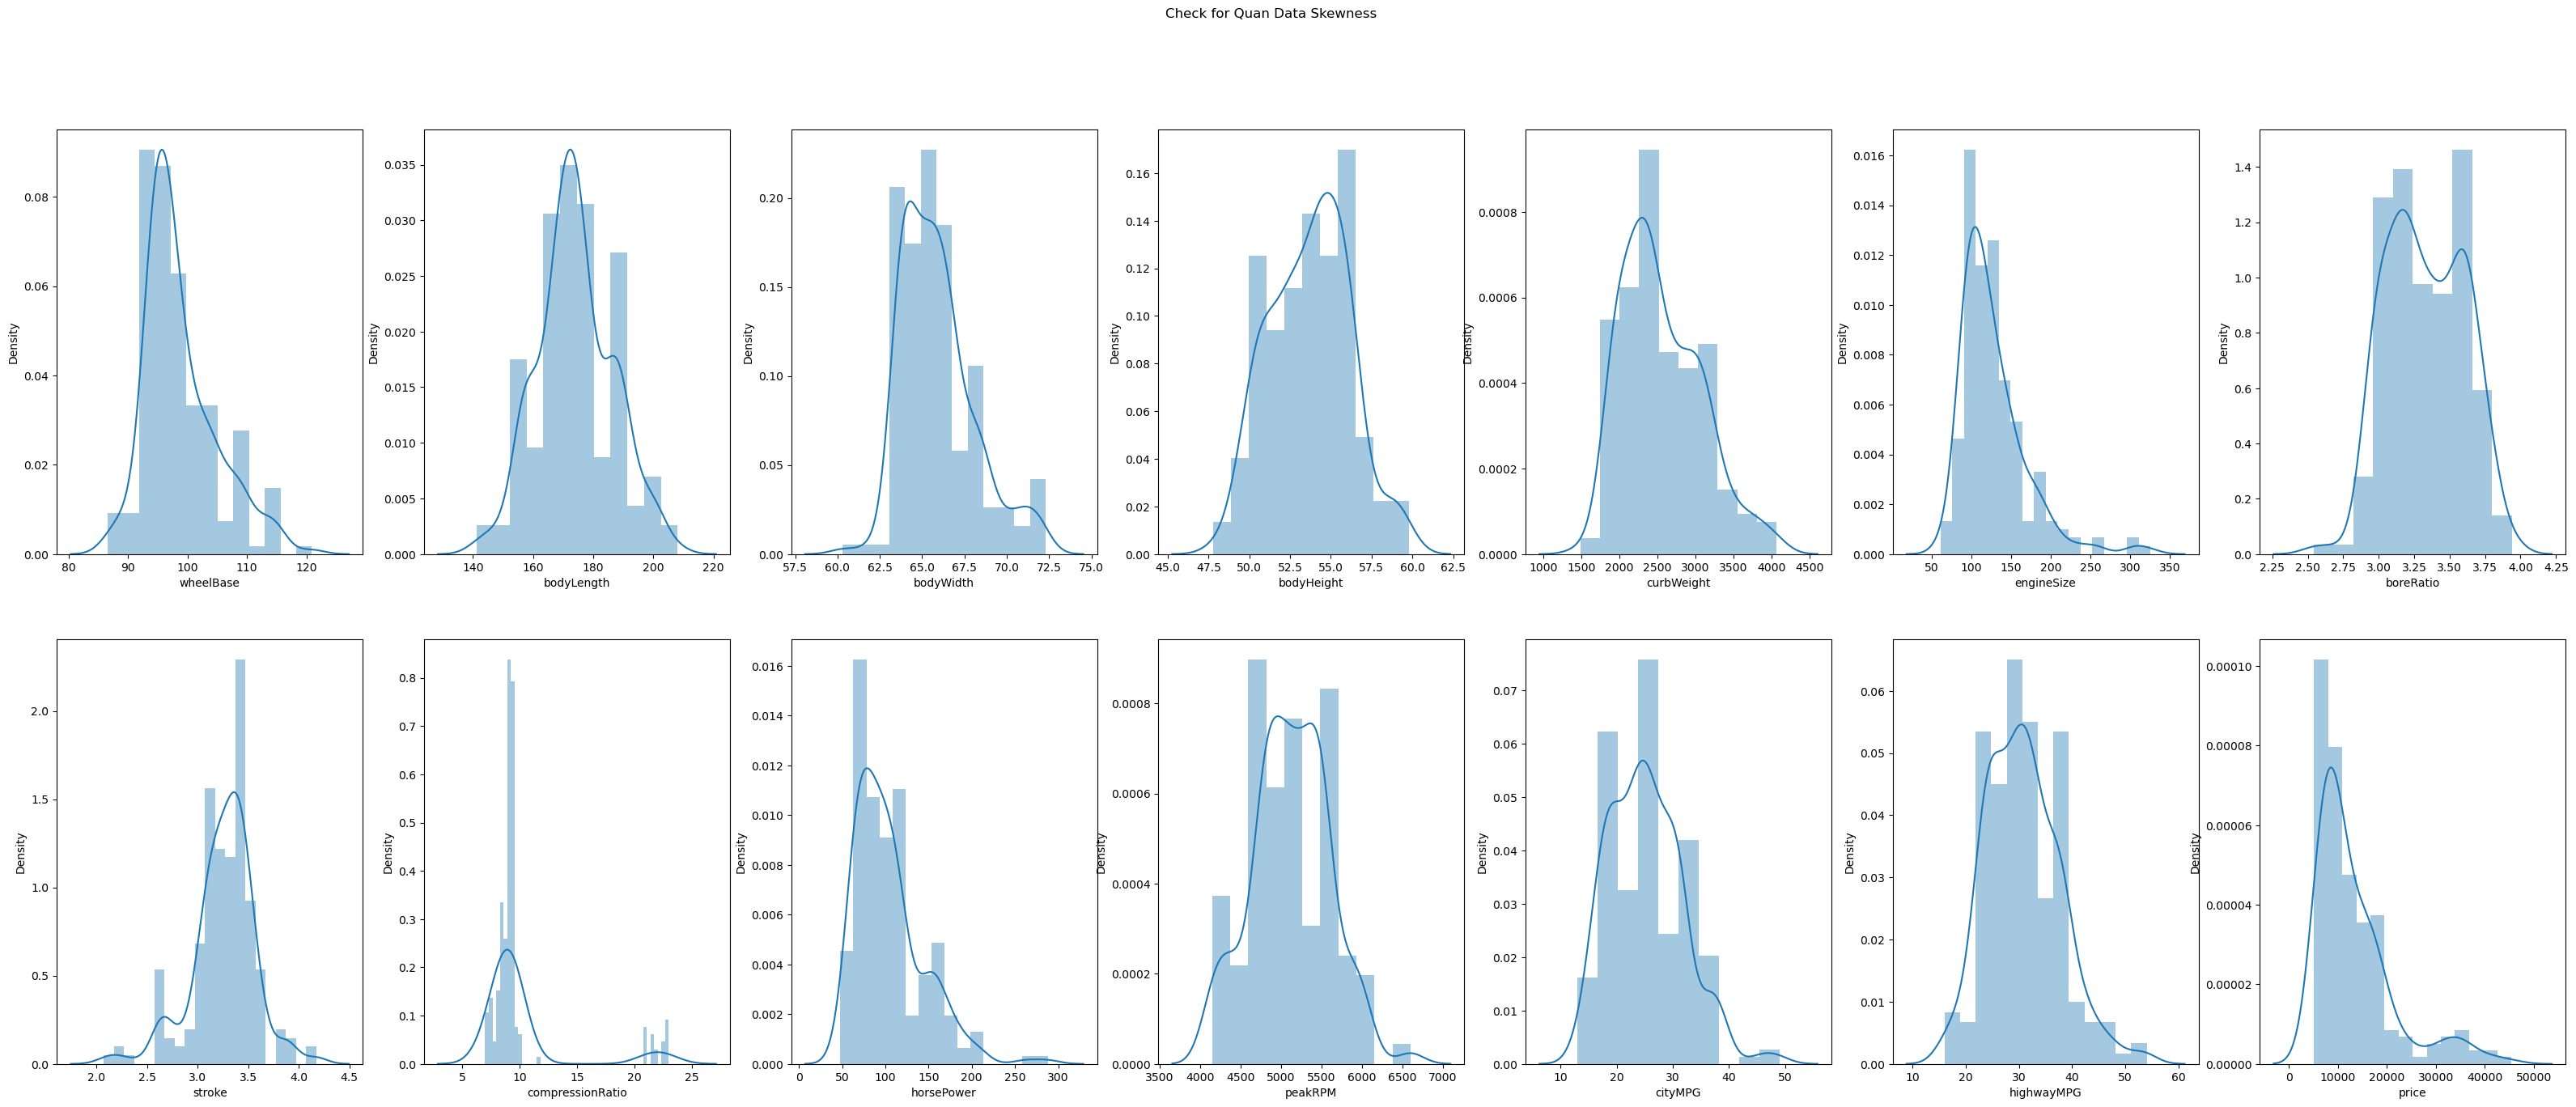

In [1118]:
plt.figure(figsize=(40,15))
columns = list(quan_data.columns) 
col_len = int(len(columns))

plt.suptitle('Check for Quan Data Skewness')
for i in range(col_len): 
    plt.subplot(2,7,i+1)
    sns.distplot(quan_data[columns[i]],kde=True) 

# skewed : price , horsePower , engineSize  

# Observe outliers of quan_data

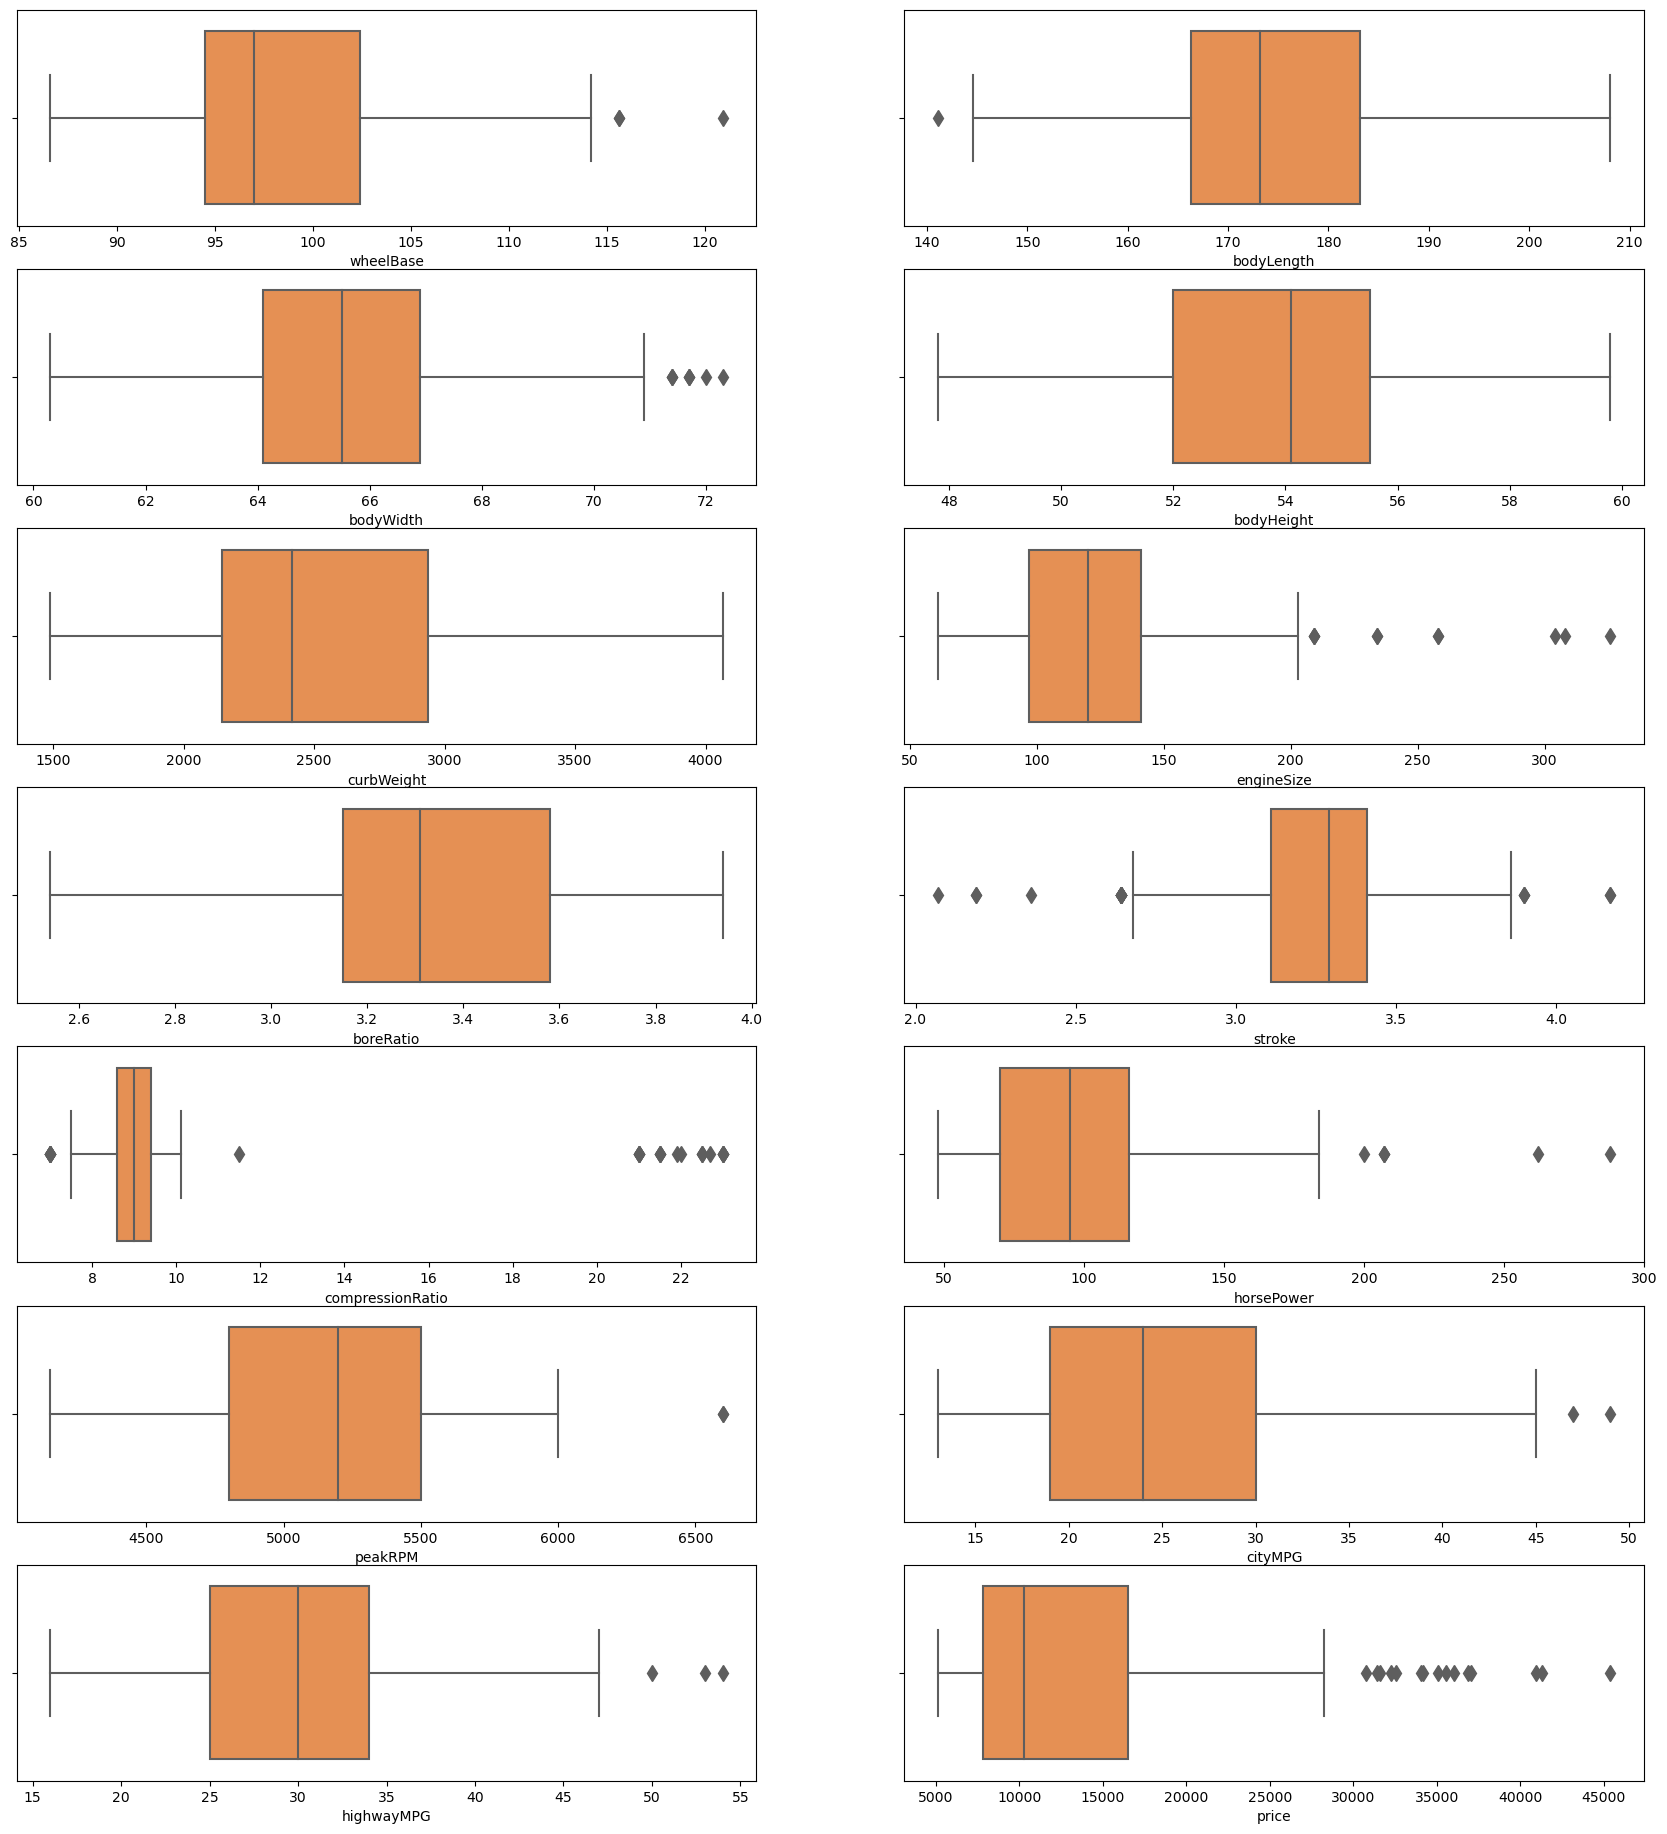

In [1119]:
# Check for outliers of carPrice_df_quan 
def boxPlot_quan(input_df) : 
    plt.figure(figsize=(21,23))
    columns = list(input_df.columns)
    col_len = int(len(columns))
    
    for i in range(1,col_len+1) : 
        plt.subplot(7,2,i)
        sns.boxplot(x=quan_data[columns[i-1]],data=input_df,fliersize=8,palette='Oranges')

boxPlot_quan(quan_data)
# outliers : price , compressionRatio , engineSize , stroke , horsePower 
# we can do data scaling to independent variables later , to cope with outliers 

# Discover distribution categorical data

In [1120]:
len(list(qua_data.columns))

11

In [1121]:
qua_data.head()

,actuarialRisk,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,engineType,cylinderNum,fuelSystem,carCategories
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,mid
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,mid
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,mid
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,mid
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,mid


# qua_data againist price 

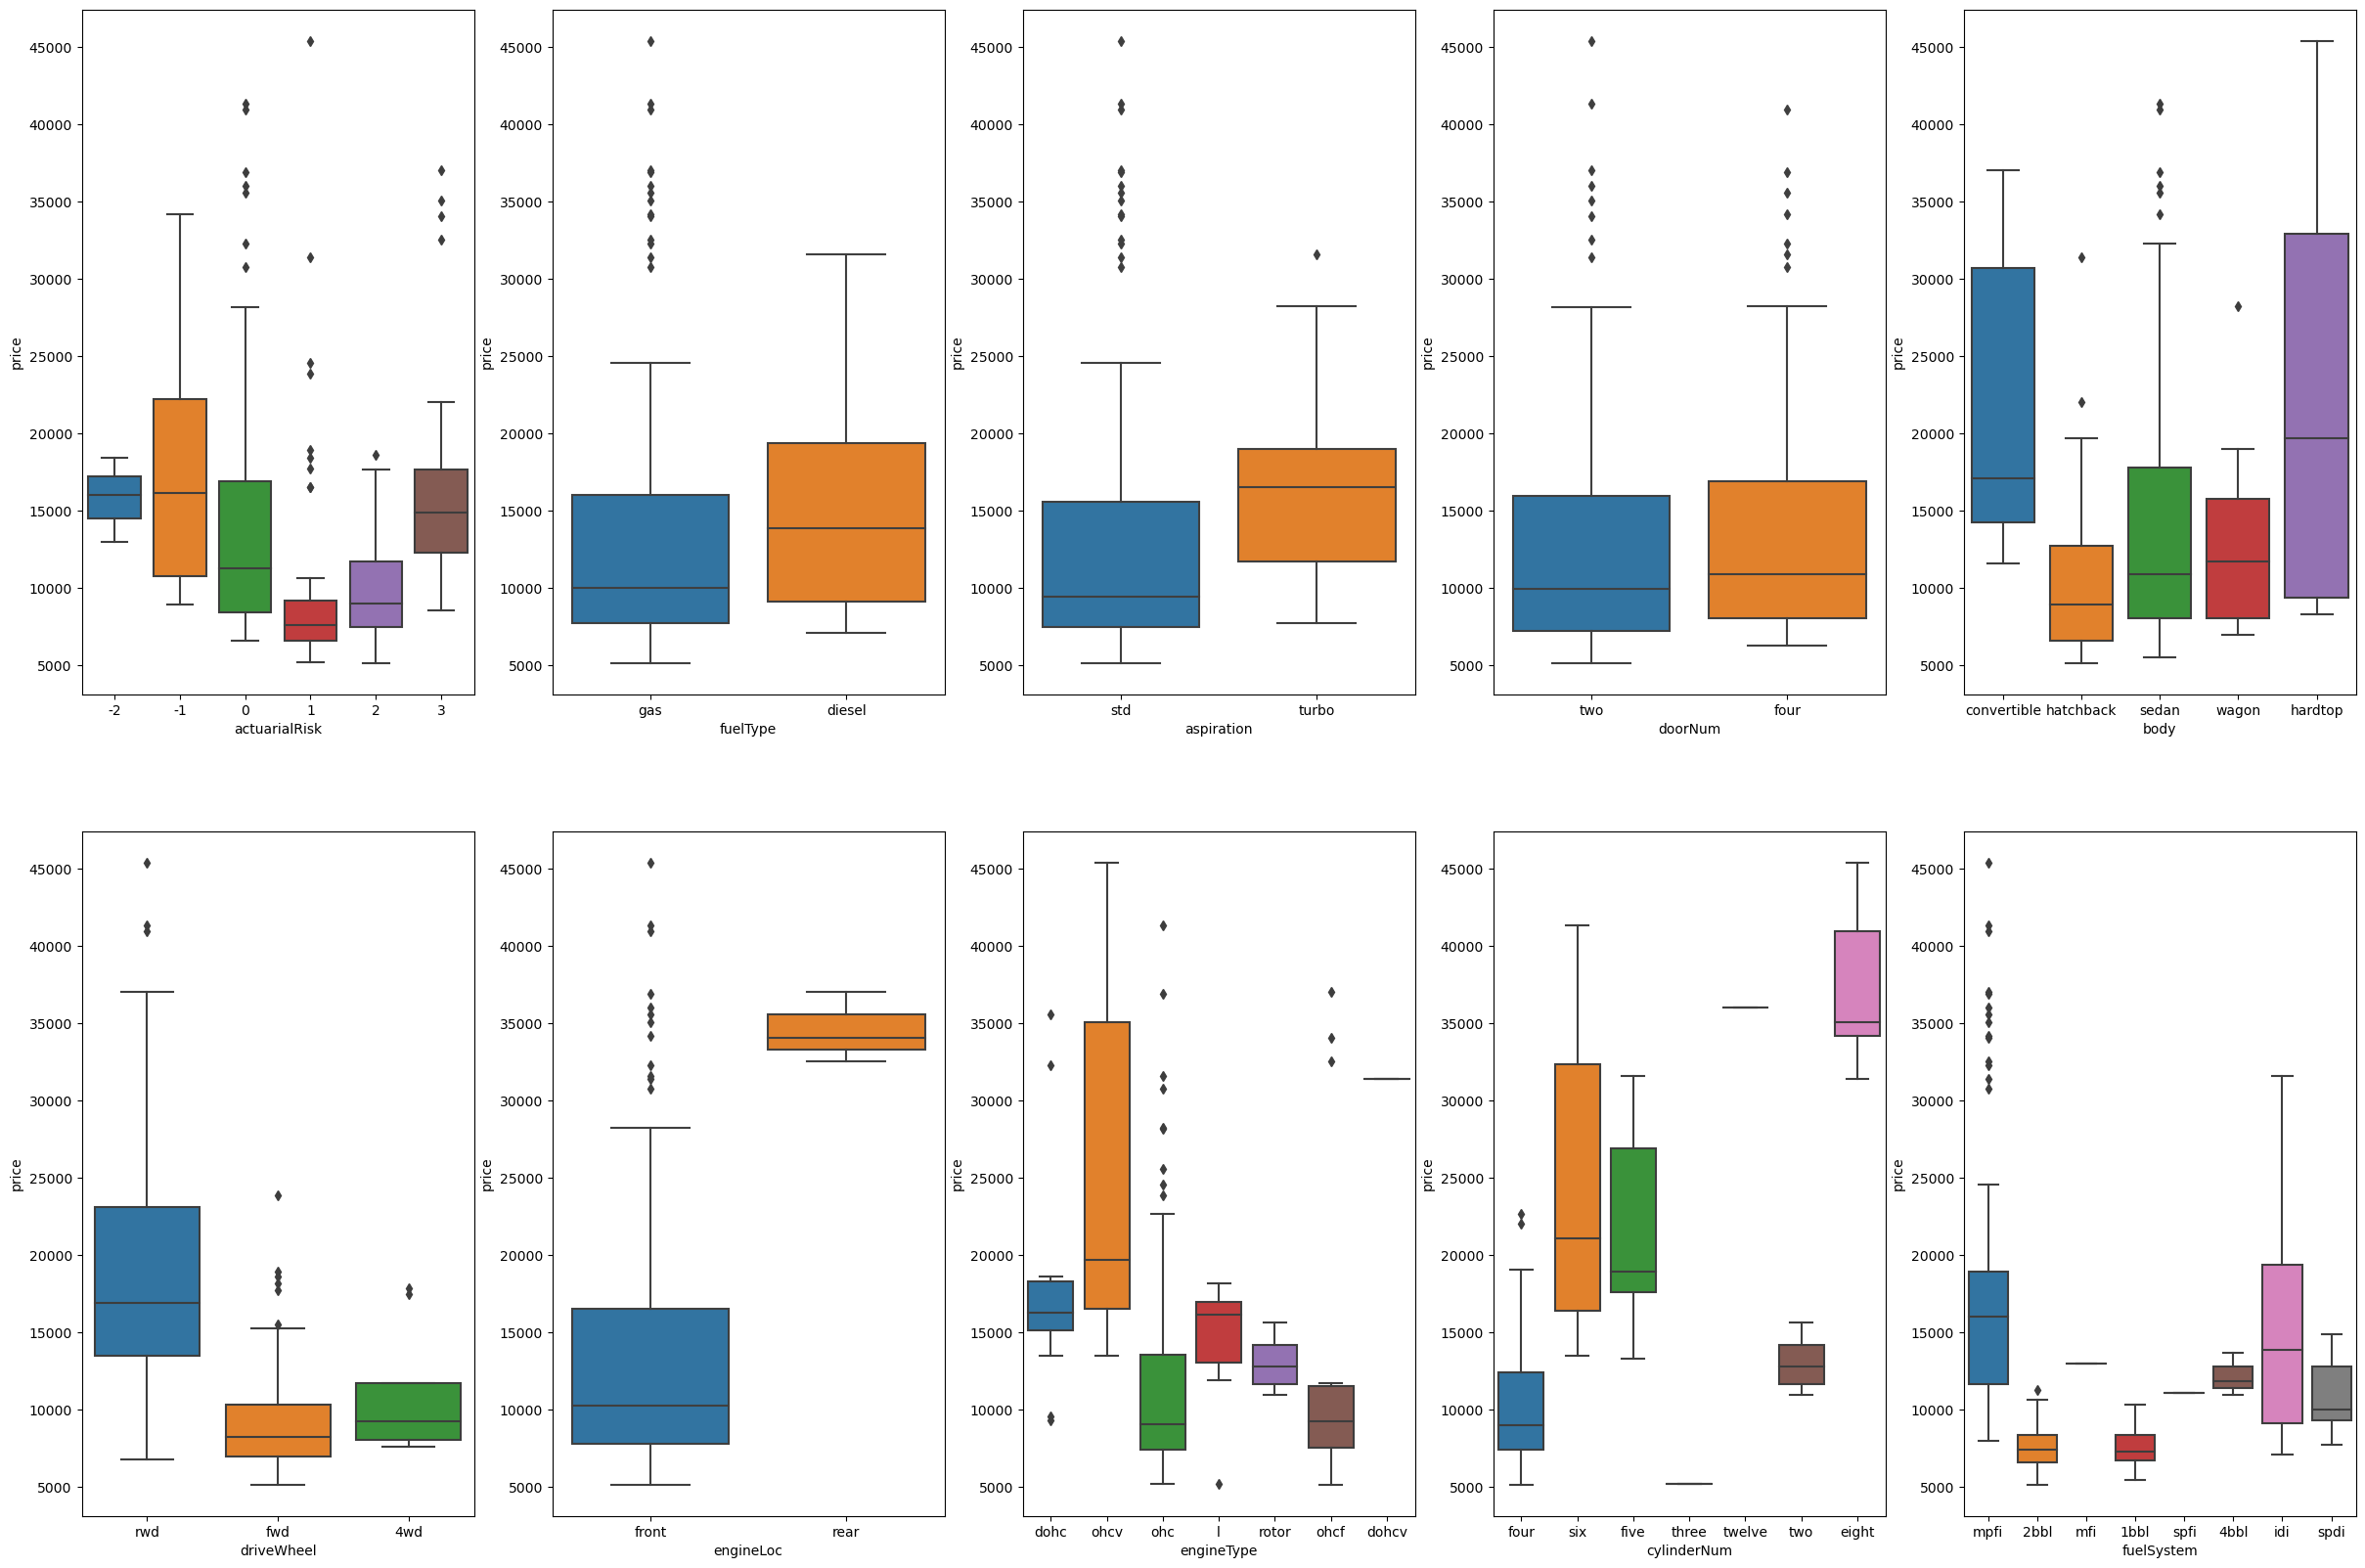

In [1122]:
def plotQua_price(input_df) : 
    plt.figure(figsize=(30,20))
    columns = list(qua_data.drop(['carCategories'],axis=1).columns)
    col_len = len(columns)
    
    for i in range(col_len) : 
        plt.subplot(2,5,i+1)
        sns.boxplot(x=columns[i],y='price',data=input_df)
    
plotQua_price(carPrice_df)
# fueltype : diesel avg price > gas 
# aspiration : turbo avg price > std 
# engineLoc : rear avg price > front 

# Below there is an error 

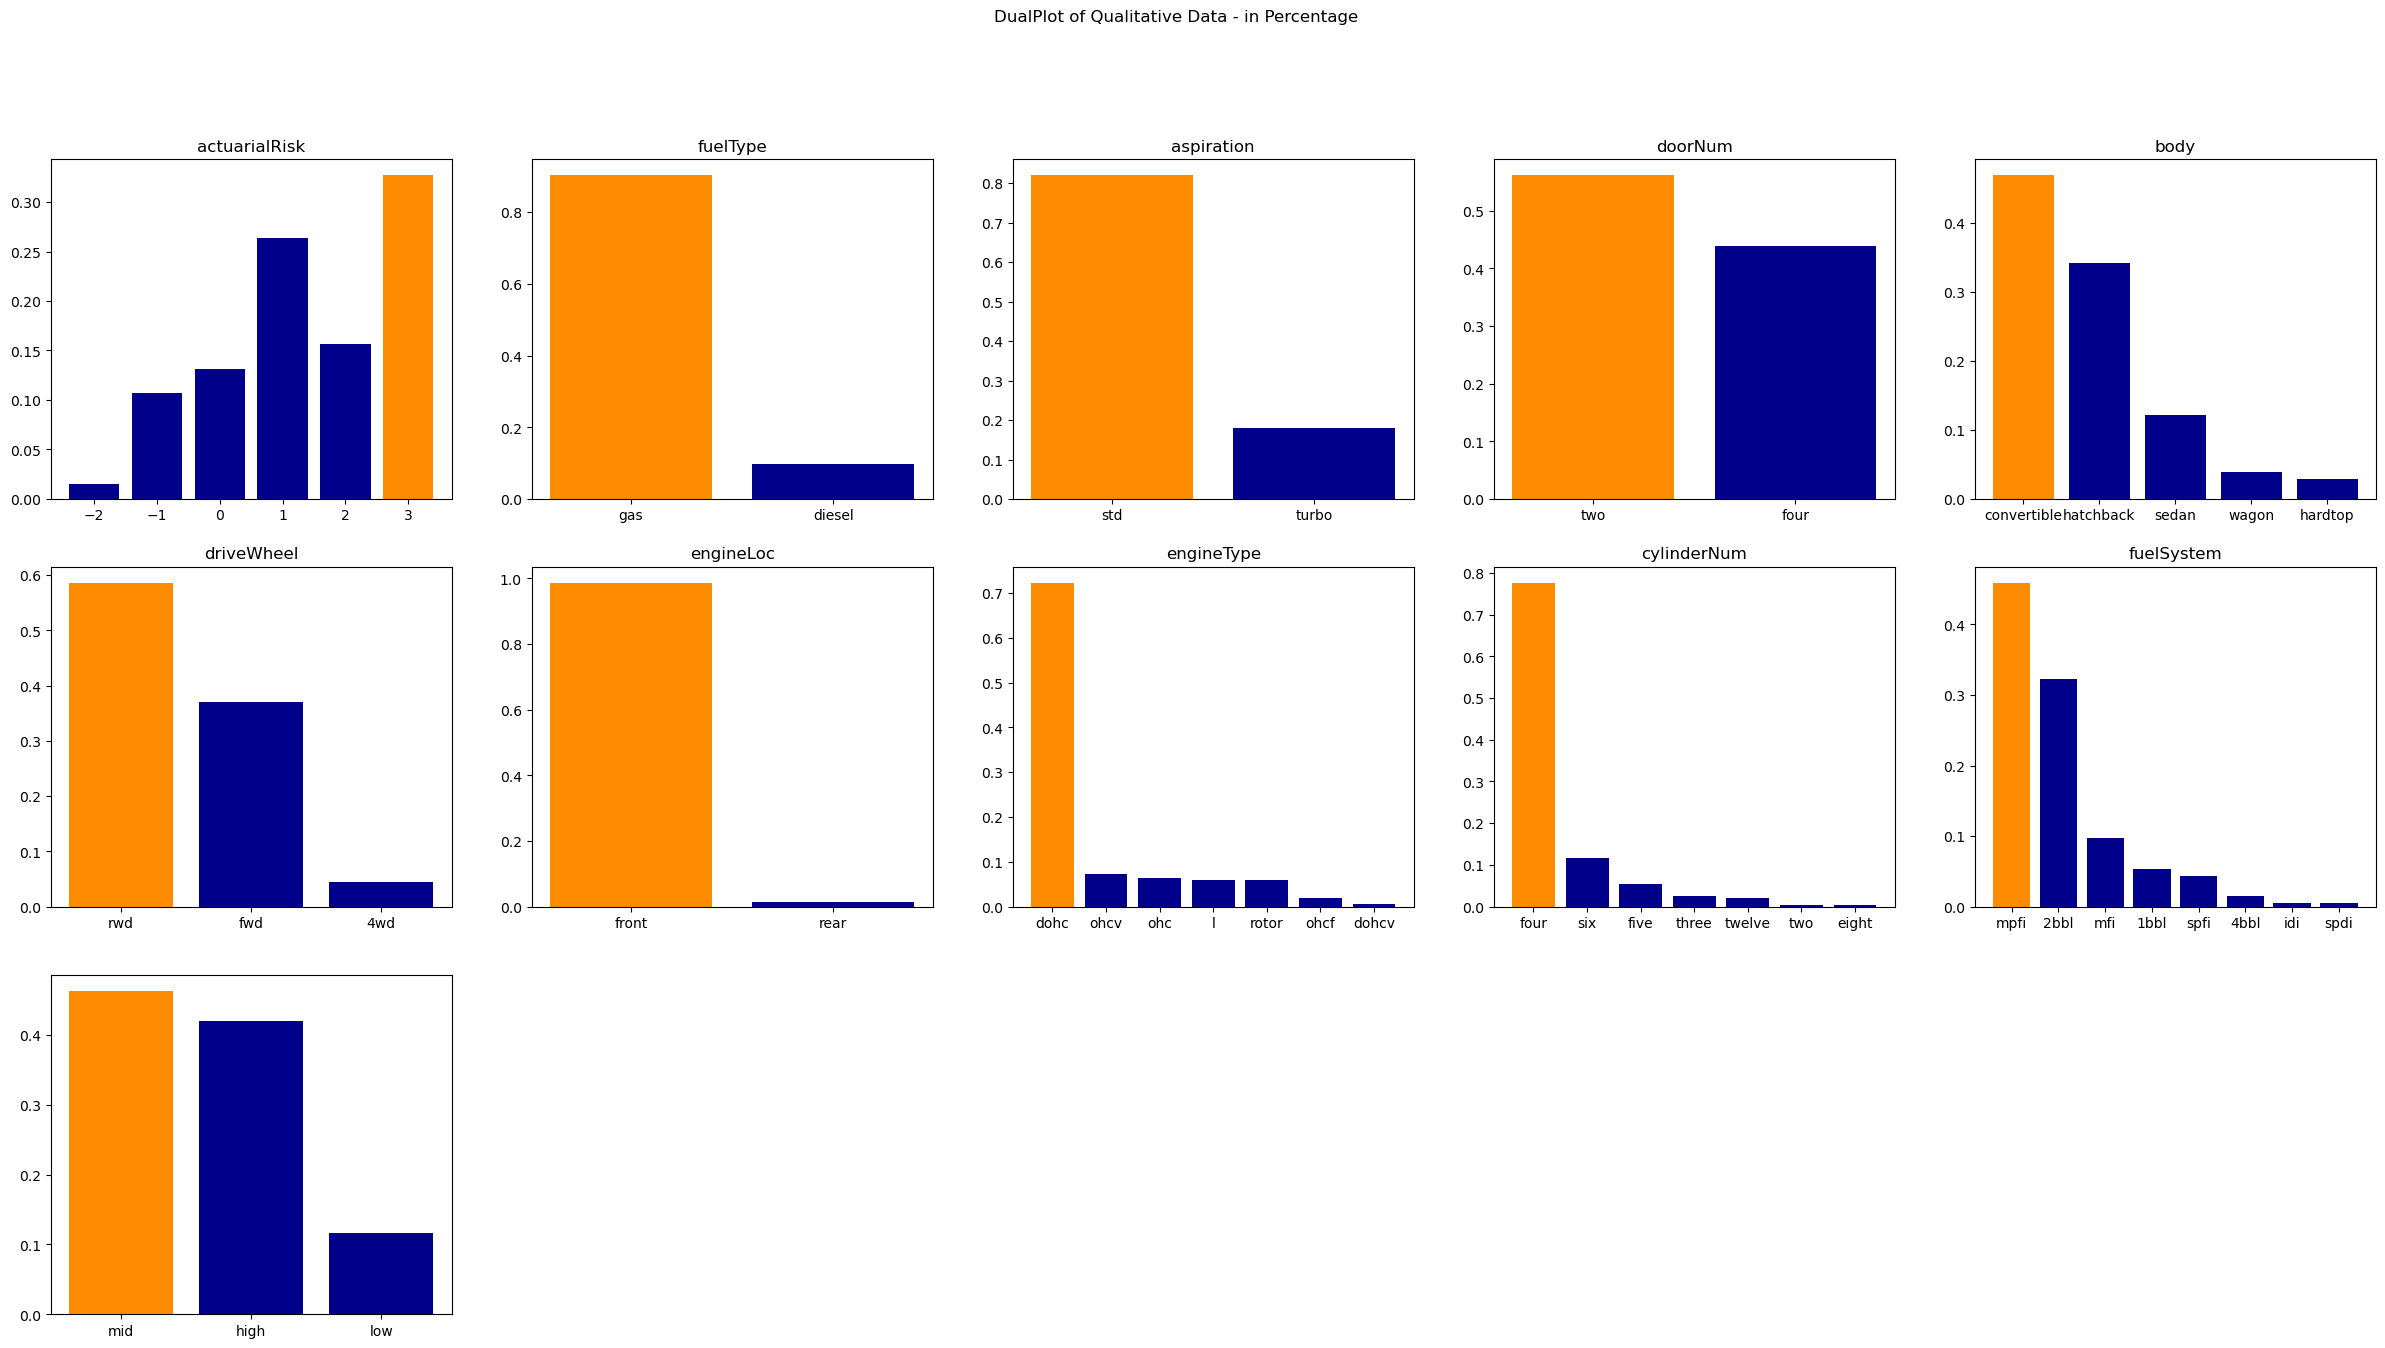

In [1123]:
# Plot qua data except ['Name']
# THE GRAPH TITLE FOR EACH QUA_DAT IS NOT CORRECT !!
def Plot_qua(input_df) :
    columns = list(input_df.columns)
    col_len = len(columns)
    plt.figure(figsize=(30,15))
    plt.suptitle('DualPlot of Qualitative Data - in Percentage')
    
    for i in range(col_len) : 
        categories = list(input_df[columns[i]].unique())
        value_per = list(input_df[columns[i]].value_counts(normalize=True))
        
        color = ['darkblue'] * len(categories)
        max_index = np.argmax(value_per)
        color[max_index] = 'darkorange'
        
        plt.title(f'{columns[i-1]}')
        plt.subplot(3,5,i+1)
        plt.bar(categories,value_per,color=color)

Plot_qua(qua_data)
# Below we can see the relative percentages of categories 
# in each features 

# Relationship - quan_data vs price

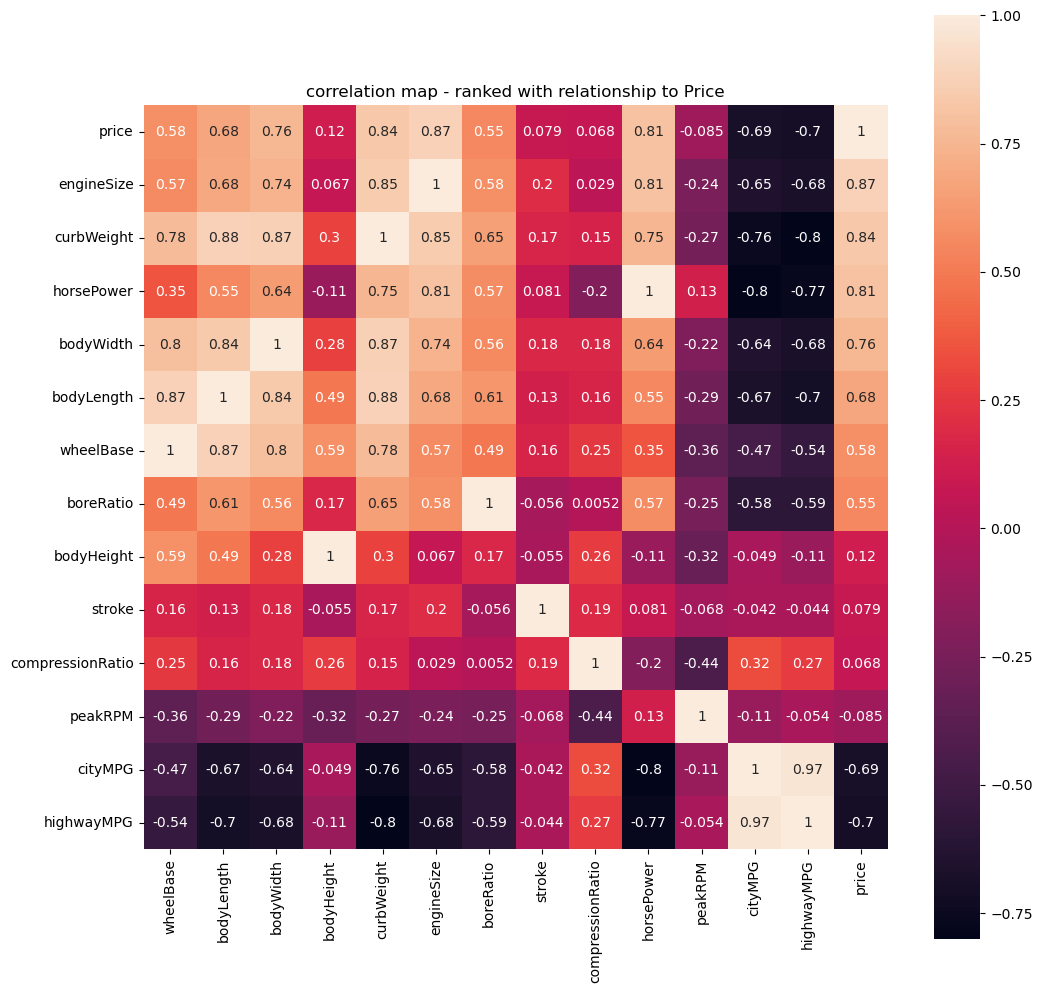

In [1124]:
# plot a heatmap 
# Here , i define : Strong relationship as |corr| >= 0.8 , weak as |corr| <= 0.2
def plot_heatMap(input_df) : 
    plt.figure(figsize=(12,12))
    plt.title('correlation map - ranked with relationship to Price')

    k = len(list(input_df.corr().columns))
    df_corr = input_df.corr().nlargest(k,'price')

    sns.heatmap(df_corr,vmax=1,square=True,annot=True)

    plt.show()

plot_heatMap(quan_data)
# weak relationship : bodyHeight , stroke , compressionRatio , peakRPM 
# CONSIDER TO DROP OUT THESE FEATUERS

# 4. Data Preparation 

# Feature Engineering 

In [1125]:
# DROPPING OF QUAN FEATURES : FROM ORIGINAL carPrice_df & quan_data 
unrelated_quan = ['bodyHeight','stroke','compressionRatio','peakRPM']
carPrice_df = carPrice_df.drop(unrelated_quan,axis=1)
quan_data = quan_data.drop(unrelated_quan,axis=1)

In [1126]:
qua_data.head()

,actuarialRisk,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,engineType,cylinderNum,fuelSystem,carCategories
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,mid
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,mid
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,mid
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,mid
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,mid


In [1127]:
quan_data.head()

,wheelBase,bodyLength,bodyWidth,curbWeight,engineSize,boreRatio,horsePower,cityMPG,highwayMPG,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450


# Data Transformation

# Categorical Data Encoding 

In [1128]:
# we quote out significant variables 
sig_col = [ 'price','carCategories','engineType','fuelType','aspiration','body','cylinderNum','driveWheel','wheelBase','curbWeight','engineSize','boreRatio','horsePower','cityMPG','highwayMPG','bodyLength','bodyWidth']
carPrice_df = carPrice_df[sig_col]
carPrice_df.head()

,price,carCategories,engineType,fuelType,aspiration,body,cylinderNum,driveWheel,wheelBase,curbWeight,engineSize,boreRatio,horsePower,cityMPG,highwayMPG,bodyLength,bodyWidth
0,13495,mid,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,16500,mid,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500,mid,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,13950,mid,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,17450,mid,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4


In [1129]:
sig_cat_col = ['carCategories','engineType','fuelType','aspiration','body','cylinderNum','driveWheel']

In [1130]:
dummies = pd.get_dummies(carPrice_df[sig_cat_col])
print(f'shape of dummies : {dummies.shape}')
print(f'type of dummies : {type(dummies)}')

shape of dummies : (205, 29)
type of dummies : <class 'pandas.core.frame.DataFrame'>


In [1131]:
carPrice_df.head()

,price,carCategories,engineType,fuelType,aspiration,body,cylinderNum,driveWheel,wheelBase,curbWeight,engineSize,boreRatio,horsePower,cityMPG,highwayMPG,bodyLength,bodyWidth
0,13495,mid,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,16500,mid,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500,mid,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,13950,mid,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,17450,mid,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4


In [1132]:
carPrice_df = pd.concat([carPrice_df,dummies],axis=1)
carPrice_df.head()

,price,carCategories,engineType,fuelType,aspiration,body,cylinderNum,driveWheel,wheelBase,curbWeight,engineSize,boreRatio,horsePower,cityMPG,highwayMPG,bodyLength,bodyWidth,carCategories_low,carCategories_mid,carCategories_high,engineType_dohc,engineType_dohcv,engineType_l,engineType_ohc,engineType_ohcf,engineType_ohcv,engineType_rotor,fuelType_diesel,fuelType_gas,aspiration_std,aspiration_turbo,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,cylinderNum_eight,cylinderNum_five,cylinderNum_four,cylinderNum_six,cylinderNum_three,cylinderNum_twelve,cylinderNum_two,driveWheel_4wd,driveWheel_fwd,driveWheel_rwd
0,13495,mid,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,16500,mid,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,16500,mid,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,13950,mid,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,17450,mid,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [1133]:
carPrice_df.drop(sig_cat_col,axis=1,inplace=True)
print(f'shape of carPrice_df : {carPrice_df.shape}')
carPrice_df.head()

shape of carPrice_df : (205, 39)


,price,wheelBase,curbWeight,engineSize,boreRatio,horsePower,cityMPG,highwayMPG,bodyLength,bodyWidth,carCategories_low,carCategories_mid,carCategories_high,engineType_dohc,engineType_dohcv,engineType_l,engineType_ohc,engineType_ohcf,engineType_ohcv,engineType_rotor,fuelType_diesel,fuelType_gas,aspiration_std,aspiration_turbo,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,cylinderNum_eight,cylinderNum_five,cylinderNum_four,cylinderNum_six,cylinderNum_three,cylinderNum_twelve,cylinderNum_two,driveWheel_4wd,driveWheel_fwd,driveWheel_rwd
0,13495,88.6,2548,130,3.47,111,21,27,168.8,64.1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,16500,94.5,2823,152,2.68,154,19,26,171.2,65.5,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,13950,99.8,2337,109,3.19,102,24,30,176.6,66.2,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,18,22,176.6,66.4,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


# Split the dataset first ( train-test-split )

In [1134]:
test_size = 0.2 
seed = 42 
carPrice_df_train , carPrice_df_test = train_test_split(carPrice_df,test_size=test_size,random_state=seed)
print(f'shape of train set : {carPrice_df_train.shape}')
print(f'shape of test set : {carPrice_df_test.shape}')

shape of train set : (164, 39)
shape of test set : (41, 39)


# Data Scaling of quan_data

In [1135]:
quan_data.head()

,wheelBase,bodyLength,bodyWidth,curbWeight,engineSize,boreRatio,horsePower,cityMPG,highwayMPG,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450


In [1136]:
list(quan_data.columns)

['wheelBase',
 'bodyLength',
 'bodyWidth',
 'curbWeight',
 'engineSize',
 'boreRatio',
 'horsePower',
 'cityMPG',
 'highwayMPG',
 'price']

In [1137]:
# Here we use standardization for rescaling 
# we only do data scaling with quan_data
standard_scaler = StandardScaler()
quan_col = list(quan_data.columns)

carPrice_df_train[quan_col] = standard_scaler.fit_transform(carPrice_df_train[quan_col])

In [1138]:
carPrice_df_train.head()
# We have successfully scales the quan_data 

,price,wheelBase,curbWeight,engineSize,boreRatio,horsePower,cityMPG,highwayMPG,bodyLength,bodyWidth,carCategories_low,carCategories_mid,carCategories_high,engineType_dohc,engineType_dohcv,engineType_l,engineType_ohc,engineType_ohcf,engineType_ohcv,engineType_rotor,fuelType_diesel,fuelType_gas,aspiration_std,aspiration_turbo,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,cylinderNum_eight,cylinderNum_five,cylinderNum_four,cylinderNum_six,cylinderNum_three,cylinderNum_twelve,cylinderNum_two,driveWheel_4wd,driveWheel_fwd,driveWheel_rwd
66,0.663070,1.037085,0.281287,0.188010,0.405836,-0.815386,0.964316,1.313501,0.072450,0.083817,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
111,0.305157,1.541231,1.016045,-0.158993,0.517384,-0.241894,-0.988126,-1.024569,1.043916,1.170268,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
153,-0.816493,-0.508962,-0.541642,-0.852999,-1.007108,-1.064730,0.964316,1.001758,-0.367616,-1.097108,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
96,-0.741259,-0.710620,-1.147082,-0.729070,-0.635281,-0.890189,0.964316,1.001758,-0.732953,-1.002634,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
38,-0.534591,-0.374523,-0.524008,-0.406852,-0.635281,-0.466304,0.313502,0.378273,-0.550285,-0.341316,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


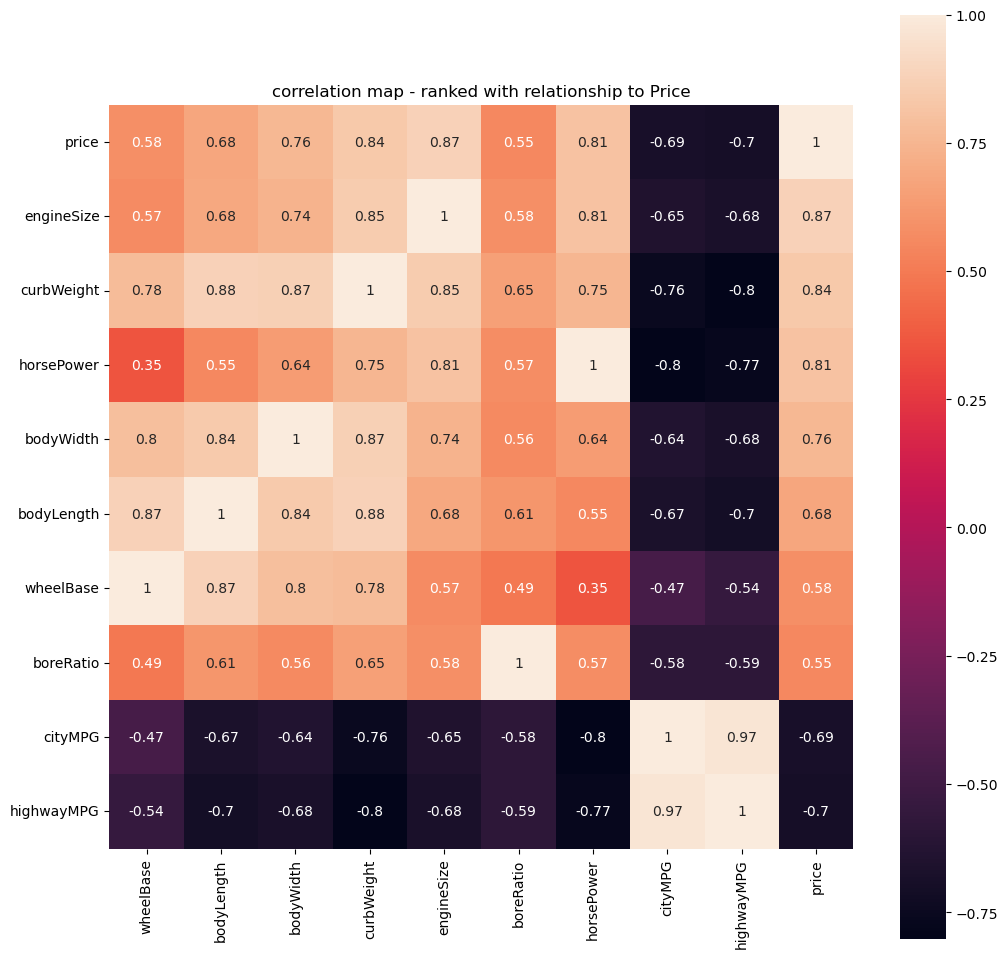

In [1139]:
# plot a heatmap 
# Here , i define : Strong relationship as |corr| >= 0.8 , weak as |corr| <= 0.2
def plot_heatMap(input_df) : 
    plt.figure(figsize=(12,12))
    plt.title('correlation map - ranked with relationship to Price')

    k = len(list(input_df.corr().columns))
    df_corr = input_df.corr().nlargest(k,'price')

    sns.heatmap(df_corr,vmax=1,square=True,annot=True)

    plt.show()

plot_heatMap(quan_data)
# weak relationship : bodyHeight , stroke , compressionRatio , peakRPM 
# CONSIDER TO DROP OUT THESE FEATUERS

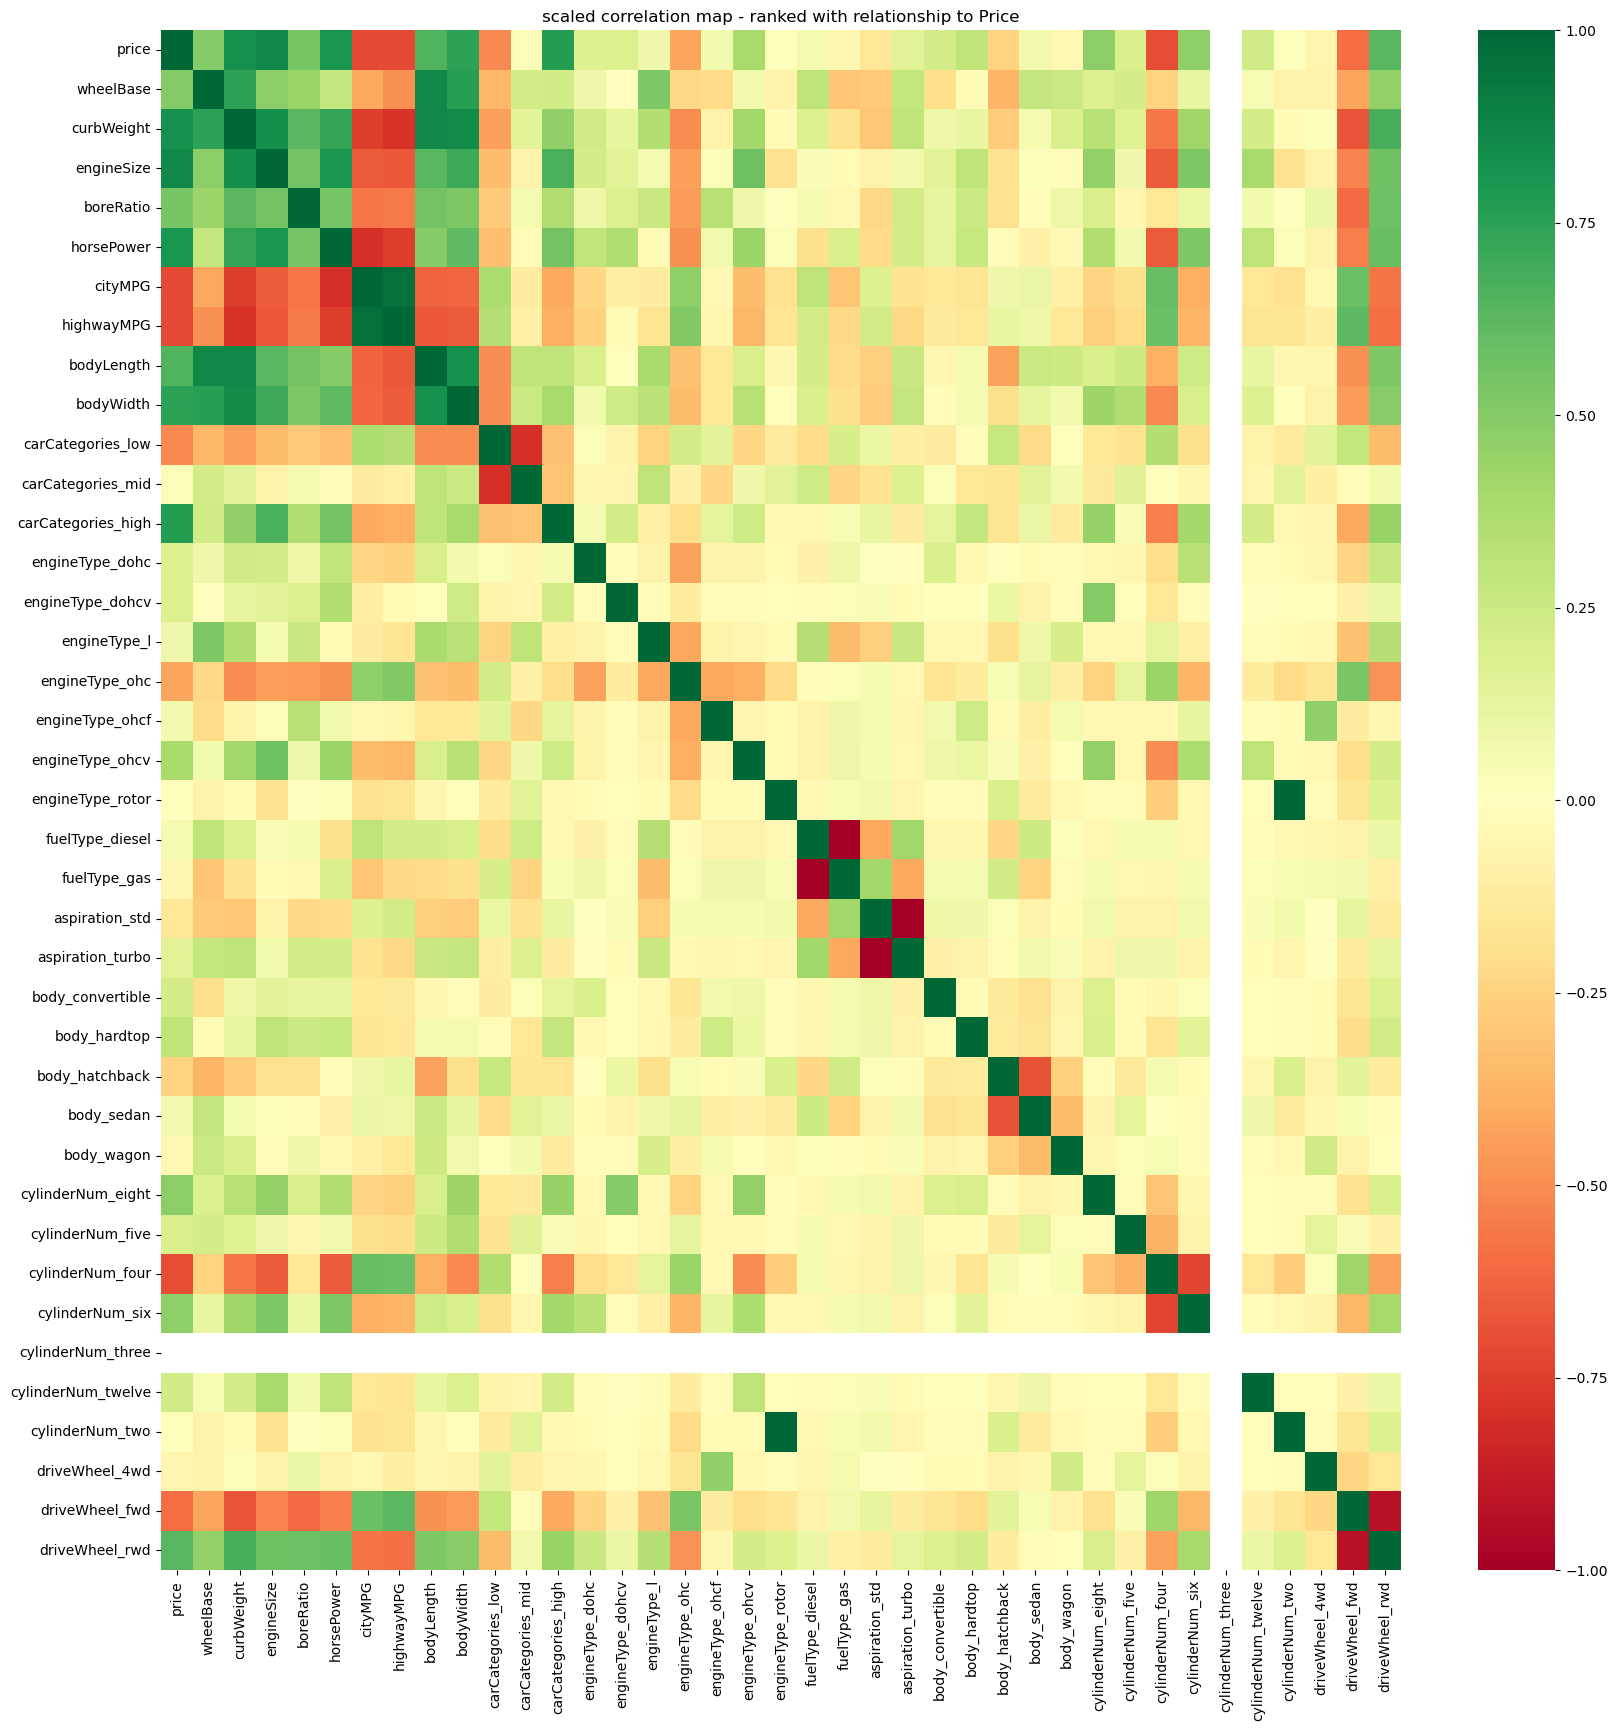

In [1140]:
plt.figure(figsize=(20,20))
plt.title('scaled correlation map - ranked with relationship to Price')
sns.heatmap(carPrice_df_train.corr(),cmap='RdYlGn')
plt.show()

# 5. Building the model 

# 5.1 Dividing into X & y sets 

In [1141]:
y_train = carPrice_df_train.pop('price')
X_train = carPrice_df_train
print(f'shape of :\nX_train : {X_train.shape}\ny_train : {y_train.shape}')
print(f'type of :\nX_train : {type(X_train)}\ny_train : {type(y_train)}')

shape of :
X_train : (164, 38)
y_train : (164,)
type of :
X_train : <class 'pandas.core.frame.DataFrame'>
y_train : <class 'pandas.core.series.Series'>


# 5.2 RFE 

In [1142]:
# First , we will use Recursive feature elimination , to pick the most related features for predicting 
# Since we have too many features , we will only pick 15 of them 

linReg_model = LinearRegression().fit(X_train,y_train)

rfe_model = RFE(estimator=linReg_model,n_features_to_select=15,step=1)
rfe_model = rfe_model.fit(X_train,y_train)

In [1143]:
list(zip(X_train.columns,rfe_model.support_,rfe_model.ranking_))

[('wheelBase', False, 16),
 ('curbWeight', True, 1),
 ('engineSize', False, 13),
 ('boreRatio', False, 8),
 ('horsePower', True, 1),
 ('cityMPG', False, 19),
 ('highwayMPG', False, 17),
 ('bodyLength', False, 9),
 ('bodyWidth', False, 4),
 ('carCategories_low', True, 1),
 ('carCategories_mid', False, 2),
 ('carCategories_high', True, 1),
 ('engineType_dohc', True, 1),
 ('engineType_dohcv', True, 1),
 ('engineType_l', True, 1),
 ('engineType_ohc', True, 1),
 ('engineType_ohcf', True, 1),
 ('engineType_ohcv', False, 5),
 ('engineType_rotor', True, 1),
 ('fuelType_diesel', True, 1),
 ('fuelType_gas', False, 18),
 ('aspiration_std', False, 21),
 ('aspiration_turbo', False, 20),
 ('body_convertible', True, 1),
 ('body_hardtop', False, 3),
 ('body_hatchback', False, 10),
 ('body_sedan', False, 15),
 ('body_wagon', False, 6),
 ('cylinderNum_eight', True, 1),
 ('cylinderNum_five', False, 23),
 ('cylinderNum_four', True, 1),
 ('cylinderNum_six', False, 12),
 ('cylinderNum_three', False, 24),
 (

In [1144]:
col_sup = X_train.columns[rfe_model.support_]
col_sup

Index(['curbWeight', 'horsePower', 'carCategories_low', 'carCategories_high',
       'engineType_dohc', 'engineType_dohcv', 'engineType_l', 'engineType_ohc',
       'engineType_ohcf', 'engineType_rotor', 'fuelType_diesel',
       'body_convertible', 'cylinderNum_eight', 'cylinderNum_four',
       'cylinderNum_two'],
      dtype='object')

In [1145]:
X_train_rfe = X_train[col_sup]
X_train_rfe.head()

,curbWeight,horsePower,carCategories_low,carCategories_high,engineType_dohc,engineType_dohcv,engineType_l,engineType_ohc,engineType_ohcf,engineType_rotor,fuelType_diesel,body_convertible,cylinderNum_eight,cylinderNum_four,cylinderNum_two
66,0.281287,-0.815386,0,0,0,0,0,1,0,0,1,0,0,1,0
111,1.016045,-0.241894,0,0,0,0,1,0,0,0,0,0,0,1,0
153,-0.541642,-1.064730,1,0,0,0,0,1,0,0,0,0,0,1,0
96,-1.147082,-0.890189,0,0,0,0,0,1,0,0,0,0,0,1,0
38,-0.524008,-0.466304,1,0,0,0,0,1,0,0,0,0,0,1,0


# 5.3 VIF 

# Rules of dropping features

# Check initial status

In [1146]:
# Adding a constant variable and Build a first fitted model

X_train_rfec = sm.add_constant(X_train_rfe)
linReg_model_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(linReg_model_rfe.summary())

# OLS is not overfitting : r-squared and adj.r-squared difference is not acceptiable 


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     191.9
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.09e-87
Time:                        14:14:17   Log-Likelihood:                 8.8641
No. Observations:                 164   AIC:                             12.27
Df Residuals:                     149   BIC:                             58.77
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4291      0

In [1147]:
# We check for multicollinearity with VIF 
# Since features numbers are large , we choose VIF against correlation matrix 
vif_model = pd.DataFrame()

vif_model['Features'] = X_train_rfe.columns
vif_model['VIF'] = [ variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_model['VIF'] = round(vif_model['VIF'],2)

vif_model = vif_model.sort_values(by='VIF',ascending=False)
vif_model

,Features,VIF
9,engineType_rotor,inf
14,cylinderNum_two,inf
13,cylinderNum_four,14.09
7,engineType_ohc,12.08
0,curbWeight,4.73
1,horsePower,4.49
6,engineType_l,3.14
2,carCategories_low,2.74
3,carCategories_high,2.51
8,engineType_ohcf,2.14


# X_train_rfe1

In [1148]:
# here we drop : engineType_rotor , cylinderNum_two

X_train_rfe1 = X_train_rfe.drop(['engineType_rotor','cylinderNum_two'],axis=1)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
linReg_model_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(linReg_model_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     196.5
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           4.12e-87
Time:                        14:14:17   Log-Likelihood:                 4.4561
No. Observations:                 164   AIC:                             19.09
Df Residuals:                     150   BIC:                             62.49
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2457      0

In [1149]:
vif_model = pd.DataFrame()

vif_model['Features'] = X_train_rfe1.columns
vif_model['VIF'] = [ variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif_model['VIF'] = round(vif_model['VIF'],2)

vif_model = vif_model.sort_values(by='VIF',ascending=False)
vif_model

,Features,VIF
12,cylinderNum_four,14.08
7,engineType_ohc,12.08
0,curbWeight,4.67
1,horsePower,4.43
6,engineType_l,3.13
2,carCategories_low,2.74
3,carCategories_high,2.51
8,engineType_ohcf,2.14
11,cylinderNum_eight,2.09
4,engineType_dohc,1.89


In [1150]:
r2_train_rfe1 = 0.945

# apply scaling to test sets 

In [1151]:
carPrice_df_test[quan_col] = standard_scaler.fit_transform(carPrice_df_test[quan_col])
carPrice_df_test.shape

(41, 39)

# Divide test set 

In [1152]:
y_test = carPrice_df_test.pop('price')
X_test = carPrice_df_test

# Train on linReg_model_rfe1

In [1154]:
# Adding constant
X_test_1_rfe1 = sm.add_constant(X_test)

X_test_new_rfe1 = X_test_1_rfe1[X_train_rfe1c.columns]

In [1155]:
# Making predictions using the final model
y_pred_rfe1 = linReg_model_rfe1.predict(X_test_new_rfe1)

# Model Evaluation

Text(0, 0.5, 'y_pred')

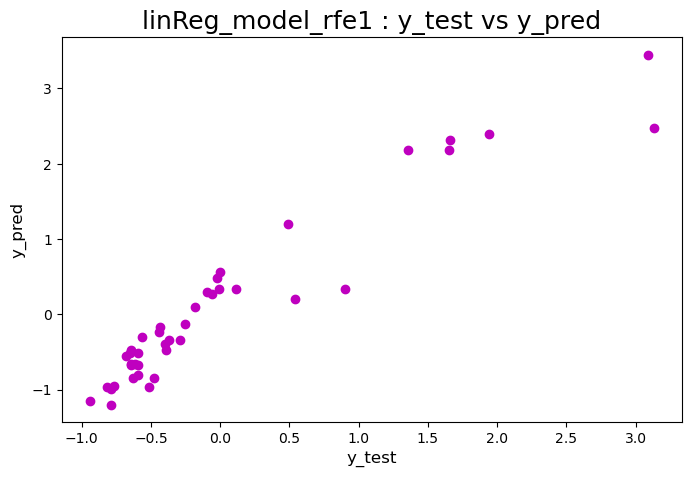

In [1156]:
plt.figure(figsize=(8,5))
plt.title(f'linReg_model_rfe1 : y_test vs y_pred' , fontsize=18)
plt.scatter(y_test,y_pred_rfe1,color='m')
plt.xlabel('y_test',fontsize=12)
plt.ylabel('y_pred',fontsize=12)

# Evaluation metrics

In [1158]:
# here we use MSE , r2 , adj r2 , RMSE 
r2_test_rfe1 = r2_score(y_test, y_pred_rfe1)
print(f'r2 score for train set is : {r2_train_rfe1}')
print(f'r2 score for test set is : {r2_test_rfe1}')

r2 score for train set is : 0.945
r2 score for test set is : 0.8732146546813626


In [1182]:
diff_rfe1 = r2_train_rfe1 - r2_test_rfe1
print(diff_rfe1)

0.07178534531863734


# Since the model is not accurate enough , we keep training it.

# X_train_rfe2

In [1159]:
# here we drop : fuelType_diesel : p-values

X_train_rfe2 = X_train_rfe1.drop(['fuelType_diesel'],axis=1)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
linReg_model_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(linReg_model_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           2.33e-86
Time:                        14:14:48   Log-Likelihood:               -0.38470
No. Observations:                 164   AIC:                             26.77
Df Residuals:                     151   BIC:                             67.07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2115      0

In [1160]:
# check VIF for model 
vif_model = pd.DataFrame()

vif_model['Features'] = X_train_rfe2.columns
vif_model['VIF'] = [ variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif_model['VIF'] = round(vif_model['VIF'],2)

vif_model = vif_model.sort_values(by='VIF',ascending=False)
vif_model

,Features,VIF
11,cylinderNum_four,14.08
7,engineType_ohc,11.86
0,curbWeight,4.08
1,horsePower,3.74
6,engineType_l,3.09
2,carCategories_low,2.68
3,carCategories_high,2.51
8,engineType_ohcf,2.11
10,cylinderNum_eight,2.08
4,engineType_dohc,1.88


# X_train_rfe3

In [1161]:
# drop engineType_dohc : p-value 

X_train_rfe3 = X_train_rfe2.drop(['engineType_dohc'],axis=1)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
linReg_model_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(linReg_model_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.32e-85
Time:                        14:14:48   Log-Likelihood:                -5.2159
No. Observations:                 164   AIC:                             34.43
Df Residuals:                     152   BIC:                             71.63
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0588      0

In [1162]:
# check VIF for model 
vif_model = pd.DataFrame()

vif_model['Features'] = X_train_rfe3.columns
vif_model['VIF'] = [ variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif_model['VIF'] = round(vif_model['VIF'],2)

vif_model = vif_model.sort_values(by='VIF',ascending=False)
vif_model

,Features,VIF
10,cylinderNum_four,10.41
6,engineType_ohc,8.44
0,curbWeight,3.90
1,horsePower,3.68
5,engineType_l,2.61
2,carCategories_low,2.47
3,carCategories_high,2.36
9,cylinderNum_eight,1.89
7,engineType_ohcf,1.72
4,engineType_dohcv,1.66


# X_train_rfe4

In [1163]:
# here we drop : engineType_l : p-values

X_train_rfe4 = X_train_rfe3.drop(['engineType_l'],axis=1)

# Adding a constant variable and Build a second fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
linReg_model_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(linReg_model_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     225.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           3.57e-86
Time:                        14:14:48   Log-Likelihood:                -6.7602
No. Observations:                 164   AIC:                             35.52
Df Residuals:                     153   BIC:                             69.62
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0233      0

In [1164]:
# check VIF for model 
vif_model = pd.DataFrame()

vif_model['Features'] = X_train_rfe4.columns
vif_model['VIF'] = [ variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif_model['VIF'] = round(vif_model['VIF'],2)

vif_model = vif_model.sort_values(by='VIF',ascending=False)
vif_model

,Features,VIF
9,cylinderNum_four,5.94
5,engineType_ohc,5.93
1,horsePower,3.17
0,curbWeight,2.77
2,carCategories_low,2.41
3,carCategories_high,2.31
8,cylinderNum_eight,1.81
6,engineType_ohcf,1.64
4,engineType_dohcv,1.61
7,body_convertible,1.14


# X_train_rfe5

In [1165]:
# Here we drop : cylinderNum_four : high VIF 

X_train_rfe5 = X_train_rfe4.drop(['cylinderNum_four'],axis=1)

# Adding a constant variable and Build a second fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
linReg_model_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(linReg_model_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     233.4
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           5.41e-85
Time:                        14:14:48   Log-Likelihood:                -12.651
No. Observations:                 164   AIC:                             45.30
Df Residuals:                     154   BIC:                             76.30
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1846      0

In [1166]:
# check VIF for model 
vif_model = pd.DataFrame()

vif_model['Features'] = X_train_rfe5.columns
vif_model['VIF'] = [ variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif_model['VIF'] = round(vif_model['VIF'],2)

vif_model = vif_model.sort_values(by='VIF',ascending=False)
vif_model

,Features,VIF
1,horsePower,3.00
0,curbWeight,2.55
5,engineType_ohc,2.40
2,carCategories_low,2.24
3,carCategories_high,2.17
8,cylinderNum_eight,1.81
4,engineType_dohcv,1.59
6,engineType_ohcf,1.37
7,body_convertible,1.10


# X_train_rfe6

In [1167]:
# Here we drop : body_convertible : p-value 

X_train_rfe6 = X_train_rfe5.drop(['body_convertible'],axis=1)

# Adding a constant variable and Build a second fitted model

X_train_rfe6c = sm.add_constant(X_train_rfe6)
linReg_model_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(linReg_model_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     250.9
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.34e-84
Time:                        14:14:48   Log-Likelihood:                -16.607
No. Observations:                 164   AIC:                             51.21
Df Residuals:                     155   BIC:                             79.11
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1598      0

In [1168]:
# check VIF for model 
vif_model = pd.DataFrame()

vif_model['Features'] = X_train_rfe6.columns
vif_model['VIF'] = [ variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif_model['VIF'] = round(vif_model['VIF'],2)

vif_model = vif_model.sort_values(by='VIF',ascending=False)
vif_model

,Features,VIF
1,horsePower,2.97
0,curbWeight,2.54
5,engineType_ohc,2.38
2,carCategories_low,2.23
3,carCategories_high,2.17
7,cylinderNum_eight,1.74
4,engineType_dohcv,1.56
6,engineType_ohcf,1.35


# X_train_rfe7

In [1169]:
# here we drop : engineType_ohc : p-value

X_train_rfe7 = X_train_rfe6.drop(['engineType_ohc'],axis=1)

# Adding a constant variable and Build a second fitted model

X_train_rfe7c = sm.add_constant(X_train_rfe7)
linReg_model_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(linReg_model_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     273.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           3.85e-84
Time:                        14:14:49   Log-Likelihood:                -20.745
No. Observations:                 164   AIC:                             57.49
Df Residuals:                     156   BIC:                             82.29
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0250      0

In [1170]:
# check VIF for model 
vif_model = pd.DataFrame()

vif_model['Features'] = X_train_rfe7.columns
vif_model['VIF'] = [ variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]
vif_model['VIF'] = round(vif_model['VIF'],2)

vif_model = vif_model.sort_values(by='VIF',ascending=False)
vif_model

,Features,VIF
1,horsePower,2.83
0,curbWeight,2.53
3,carCategories_high,1.72
6,cylinderNum_eight,1.70
4,engineType_dohcv,1.55
2,carCategories_low,1.24
5,engineType_ohcf,1.19


In [1171]:
# Lets evalute some metrics on training data 
r2_train_rfe7 = 0.925
print(f'Below are evaluation metrics of train set : ')
print(f'r2 score : {r2_train_rfe7}')

Below are evaluation metrics of train set : 
r2 score : 0.925


# X_train_rfe8

In [1172]:
# here we drop engineType_ohcf : p-value

X_train_rfe8 = X_train_rfe7.drop(['engineType_ohcf'],axis=1)

# Adding a constant variable and Build a second fitted model

X_train_rfe8c = sm.add_constant(X_train_rfe8)
linReg_model_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(linReg_model_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     312.4
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.40e-84
Time:                        14:14:49   Log-Likelihood:                -22.755
No. Observations:                 164   AIC:                             59.51
Df Residuals:                     157   BIC:                             81.21
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0229      0

In [1173]:
# check VIF for model 
vif_model = pd.DataFrame()

vif_model['Features'] = X_train_rfe8.columns
vif_model['VIF'] = [ variance_inflation_factor(X_train_rfe8.values,i) for i in range(X_train_rfe8.shape[1])]
vif_model['VIF'] = round(vif_model['VIF'],2)

vif_model = vif_model.sort_values(by='VIF',ascending=False)
vif_model

,Features,VIF
1,horsePower,2.77
0,curbWeight,2.47
5,cylinderNum_eight,1.69
3,carCategories_high,1.65
4,engineType_dohcv,1.54
2,carCategories_low,1.16


In [1174]:
# Seems we found out best model 
# Lets evalute some metrics on training data 
r2_train_rfe8 = 0.923
print(f'Below are evaluation metrics of train set : ')
print(f'r2 score : {r2_train_rfe8}')

Below are evaluation metrics of train set : 
r2 score : 0.923


# 6. Residual Analysis of train data

In [1175]:
y_train_price = linReg_model_rfe8.predict(X_train_rfe8c)

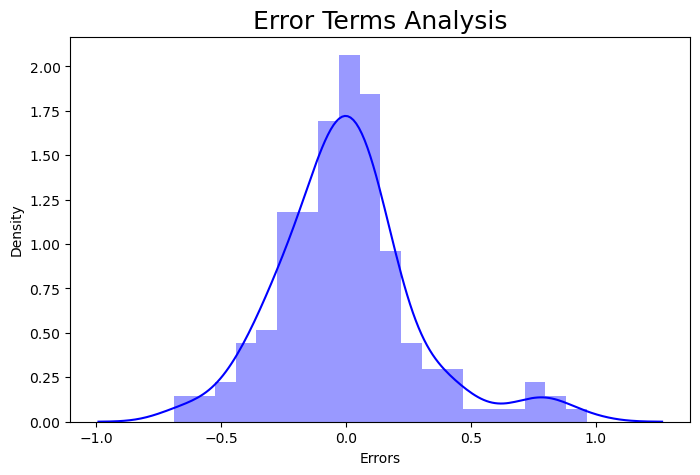

In [1176]:
# Plot the histogram of the error terms
plt.figure(figsize=(8,5))
plt.title('Error Terms Analysis',fontsize = 18)
sns.distplot((y_train - y_train_price), bins = 20,color='blue')              
plt.xlabel('Errors', fontsize = 10)
plt.show()
# no problem seems to occur in the model 

# 7. Making prediction 

# Train on linReg_model_rfe8

In [1177]:
# Adding constant
X_test_1_rfe8 = sm.add_constant(X_test)

X_test_new_rfe8 = X_test_1_rfe8[X_train_rfe8c.columns]

In [1178]:
# Making predictions using the final model
y_pred_rfe8 = linReg_model_rfe8.predict(X_test_new_rfe8)

# 8. Model Evaluation

Text(0, 0.5, 'y_pred')

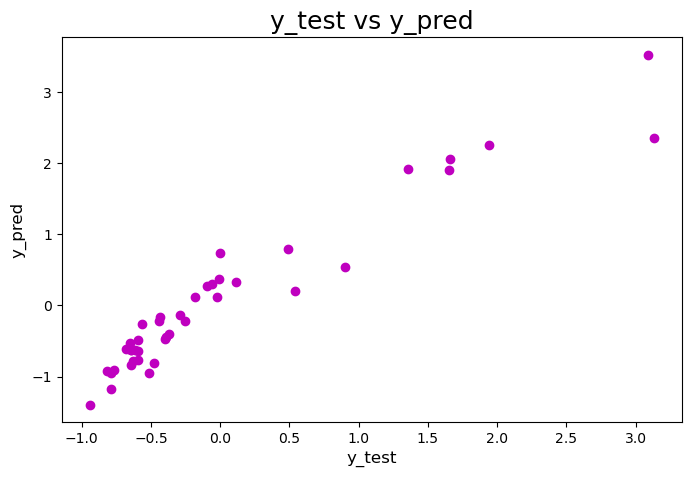

In [1179]:
plt.figure(figsize=(8,5))
plt.title(f'y_test vs y_pred' , fontsize=18)
plt.scatter(y_test,y_pred_rfe8,color='m')
plt.xlabel('y_test',fontsize=12)
plt.ylabel('y_pred',fontsize=12)

# Evaluation metrics

In [1180]:
# here we use MSE , r2 , adj r2 , RMSE 
r2_test_rfe8 = r2_score(y_test, y_pred_rfe8)
print(f'r2 score for train set is : {r2_train_rfe8}')
print(f'r2 score for test set is : {r2_test_rfe8}')

r2 score for train set is : 0.923
r2 score for test set is : 0.9028384848014033


In [1183]:
diff_rfe8 = r2_train_rfe8 - r2_test_rfe8
print(diff_rfe8)

0.02016151519859677


# 9. Conclusion 

We perform multi-linear regression model , demonstraing techniques like RFE ( feature selection ) , and VIF ( reduce collinearity ) . 

And the final model has 0.02 difference in train and test set , which is satisfying